# Analysis of the Olympic Games dataset from 1896 to 2016 

## Introduction:
### Ce Dataset constitue un ensemble de donnée brute tournant au tour des fameux jeux olympique qui se sont deroulés dans le monde durant la periode de 1896 à 2016, une énorme bibliothèque remplie d'informations cruciaux avec beaucoup de myster qui nous attend.
### Plongeons au coeur du vif et explorons ensemble cette montagne de donneés à travers des statitisques et des modélisations soigneusement mis en place

 ### Importation du fichiers ainsi que des differents Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
atheltes=pd.read_csv("athlete_events.csv") 

## Transformation des tables en DataFrame grace a Pandas

In [8]:
atheltes

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

# Debut de l'analyse et modelisation grace a python

### 1.Le nombre d’athlètes, de nations et d’épreuves a-t-il évolué au fil du temps ?

In [77]:
### Separons les athlètes de jeu d'hiver et d'ete
atheltes_hiver=atheltes[atheltes["Season"]=="Winter"]
atheltes_ete=atheltes[atheltes["Season"]=="Summer"]

In [78]:
### Comptons le nombre d'athlète pour chaque edition
### Pour les jeux d'hiver
atheltes_hiver.groupby("Year")["ID"].nunique() ### Compte chaque individue d'ID unique d'hiver
data0=pd.merge(atheltes_hiver.groupby("Year")['ID'].nunique(),atheltes_hiver.groupby("Year")['ID'].count(),on="Year") ### Jointure entre deux tables
data0["Ratio"]=data0["ID_x"]/data0["ID_y"] ### Ajout d'une nouvelle colonne ration
data0.rename(columns={"ID_x":"ID_Unique","ID_y":"ID_Total_hiver"},inplace=True)
data0

ID_Unique  ID_Total_hiver     Ratio
Year                                     
1924        313             460  0.680435
1928        461             582  0.792096
1932        252             352  0.715909
1936        668             895  0.746369
1948        668            1075  0.621395
1952        694            1088  0.637868
1956        821            1307  0.628156
1960        665            1116  0.595878
1964       1094            1778  0.615298
1968       1160            1891  0.613432
1972       1008            1655  0.609063
1976       1128            1861  0.606126
1980       1071            1746  0.613402
1984       1273            2134  0.596532
1988       1425            2639  0.539977
1992       1801            3436  0.524156
1994       1738            3160  0.550000
1998       2179            3605  0.604438
2002       2399            4109  0.583840
2006       2494            4382  0.569147
2010       2536            4402  0.576102
2014       2745            4891  0.561235

<Axes: xlabel='Year'>

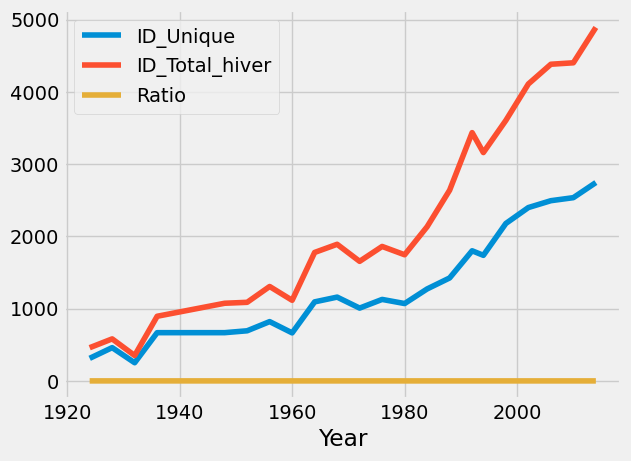

In [79]:
data0.plot()

In [80]:
### Pour les jeux d'ete
atheltes_ete.groupby("Year")["ID"].nunique() ### Compte chaque individue d'ID unique d'ete
data1=pd.merge(atheltes_ete.groupby(["Year"])["ID"].nunique(),atheltes_ete.groupby(['Year'])['ID'].count(),on="Year")
data1["Ration"]=data1["ID_x"]/data1["ID_y"]
data1.rename(columns={"ID_x":"ID_unique","ID_y":"ID_total_ete"})

ID_unique  ID_total_ete    Ration
Year                                   
1896        176           380  0.463158
1900       1224          1936  0.632231
1904        650          1301  0.499616
1906        841          1733  0.485286
1908       2024          3101  0.652693
1912       2409          4040  0.596287
1920       2676          4292  0.623486
1924       3256          5233  0.622205
1928       3247          4992  0.650441
1932       1922          2969  0.647356
1936       4484          6506  0.689210
1948       4402          6405  0.687276
1952       4932          8270  0.596372
1956       3347          5127  0.652818
1960       5352          8119  0.659194
1964       5137          7702  0.666970
1968       5558          8588  0.647182
1972       7114         10304  0.690411
1976       6073          8641  0.702812
1980       5259          7191  0.731331
1984       6798          9454  0.719061
1988       8454         12037  0.702334
1992       9386         12977  0.723280
1996      10339         13780  0.750290
2000      10647         13821  0.770349
2004      10557         13443  0.785316
2008      10899         13602  0.801279
2012      10517         12920  0.814009
2016      11179         13688  0.816701

<Axes: xlabel='Year'>

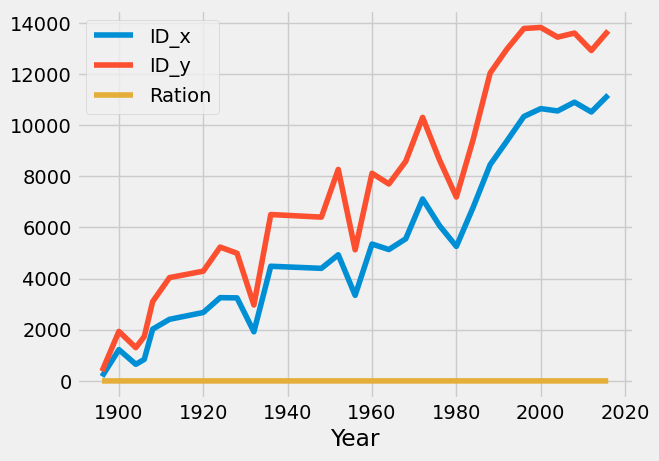

In [81]:
data1.plot()

In [82]:
atheltes["Team"].nunique() ### Il ne n'existe pas 1184 pays dans le monde
                          ### D'ou Team ne peut pas etre utiliser comme nation

1184

In [83]:
atheltes["NOC"].nunique() ###  Ca c'est beaucoup plus coherent

230

In [84]:
### L'evolution des nations pour jeu d'hiver et pour les jeux d'ete
atheltes_hiver.groupby("Year")["NOC"].nunique()
atheltes_ete.groupby("Year")["NOC"].nunique()
data2=pd.merge(atheltes_hiver.groupby("Year")["NOC"].nunique(),atheltes_ete.groupby("Year")['NOC'].nunique(),on="Year")
data2.rename(columns={"NOC_x":"Nation_hiver","NOC_y":"Nation_ete"},inplace=True)
data2


Nation_hiver  Nation_ete
Year                          
1924            19          45
1928            25          46
1932            17          47
1936            28          49
1948            28          59
1952            30          69
1956            32          72
1960            30          84
1964            36          93
1968            37         112
1972            35         121
1976            37          92
1980            37          80
1984            49         140
1988            57         159
1992            64         169

<Axes: xlabel='Year'>

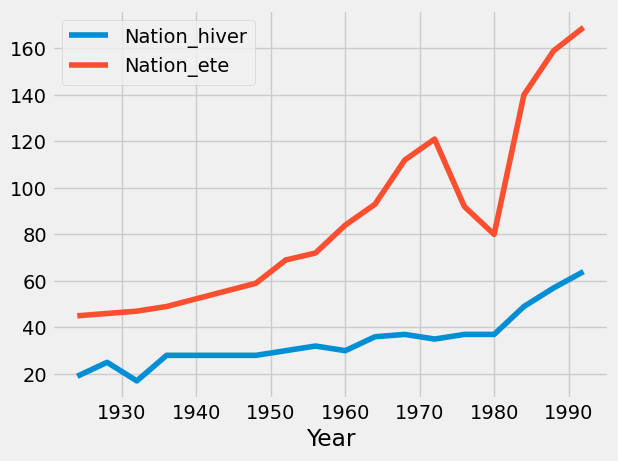

In [85]:


data2.plot()

<Axes: xlabel='Year'>

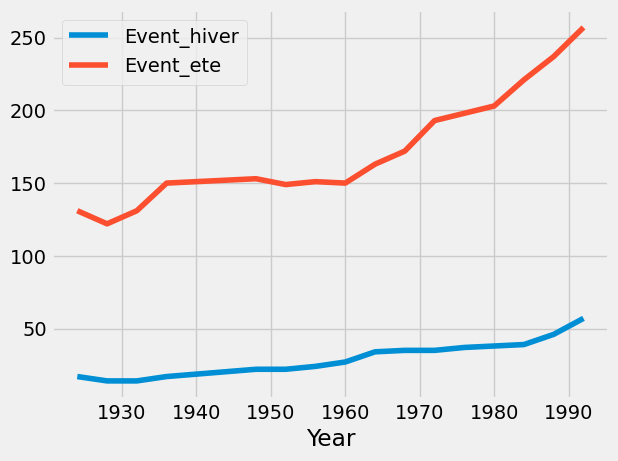

In [86]:
### L'evolution du nombre d'epreuve a travers le temps
atheltes_hiver.groupby("Year")["Event"].nunique()
atheltes_ete.groupby("Year")["Event"].nunique()
data4=pd.merge(atheltes_hiver.groupby("Year")["Event"].nunique(),atheltes_ete.groupby("Year")['Event'].nunique(),on="Year")
data4.rename(columns={"Event_x":"Event_hiver","Event_y":"Event_ete"},inplace=True)
data4
### Representation de l'evolution des epreuves a travers le temps
data4.plot()

In [87]:
### Classement des sports
clsassement_athelte=atheltes.groupby("Sport")["ID"].count().sort_values(ascending=False).head(10)
clsassement_athelte

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: ID, dtype: int64

In [88]:
### Le pourcentage de ses classemnt
## Grace a la fonction lambda on vient de calculer le % du nombre d'athlètes qui se trouve dans chaque sport
clsassement_athelte.apply(lambda x: x/atheltes["ID"].count()*100).head(10)

Sport
Athletics               14.246300
Gymnastics               9.850765
Swimming                 8.555379
Shooting                 4.222547
Cycling                  4.005297
Fencing                  3.959560
Rowing                   3.907921
Cross Country Skiing     3.368669
Alpine Skiing            3.256540
Wrestling                2.638723
Name: ID, dtype: float64

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

Text(1975, 4500, 'Moscow 1980')

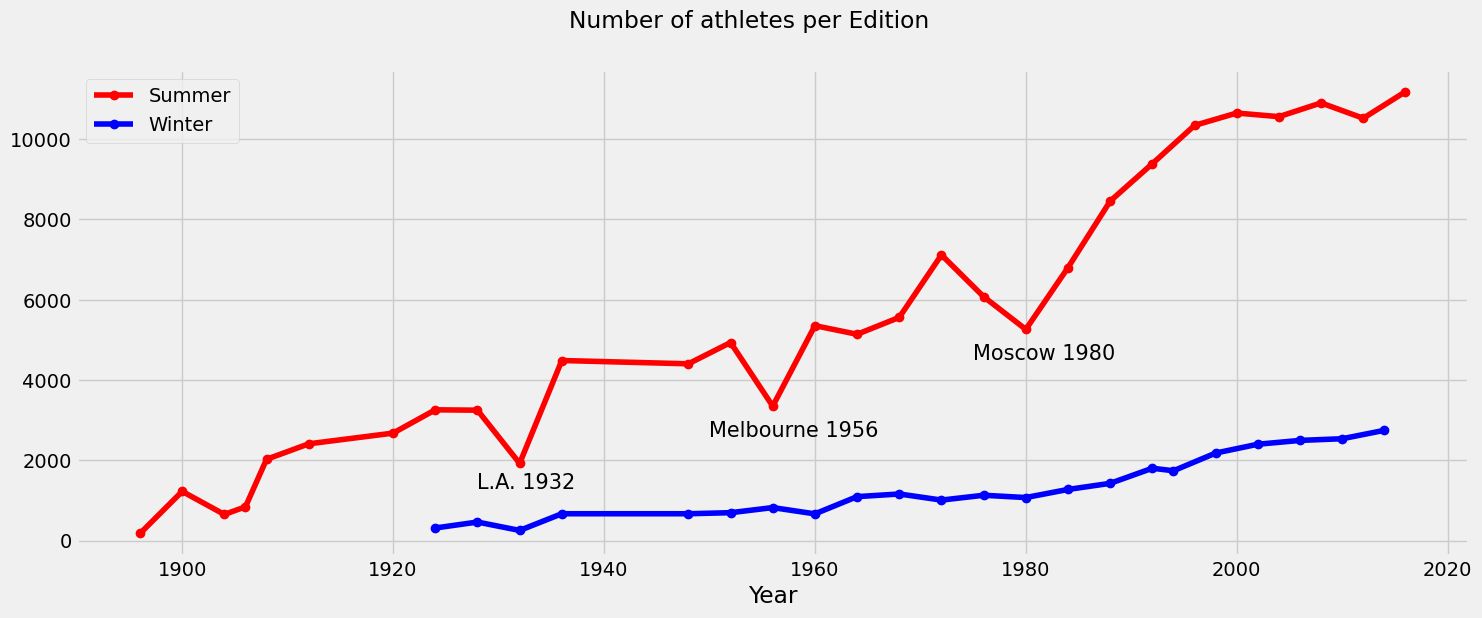

In [90]:


from matplotlib import colormaps
### Fusion des tables athletes et Events afin d'avoir une separation entre les JO d'Hiver et d'Ete
jo_all=atheltes

### Separation en 2DF d'Ete et d'Hiver
jo_ete=jo_all[jo_all["Season"]=="Summer"]
jo_hiver=jo_all[jo_all["Season"]=="Winter"]


### Representation Visuelle du nombre de participation des JEUX OlYMPIQUE par edition d'Ete et d'Hiver
###Changement de style par defaut du pyplot
####plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

jo_ete.groupby("Year")['ID'].nunique().plot(ax=ax, colormap='hsv',marker='o',label="Summer")
jo_hiver.groupby("Year")["ID"].nunique().plot(ax=ax,colormap="winter",marker="o",label="Winter")

fig.suptitle("Number of athletes per Edition")
ax.legend()
ax.annotate("L.A. 1932", xy=(1928, 1300), xycoords="data", fontsize = 15)
ax.annotate("Melbourne 1956", xy=(1950, 2600), xycoords="data", fontsize = 15)
ax.annotate("Moscow 1980", xy=(1975, 4500), xycoords="data", fontsize = 15)

In [91]:

### Production numérique du nombre de participation des JO par edition d'Ete et d'Hiver
jo_ete.groupby("Year")["ID"].nunique()
jo_hiver.groupby("Year")["ID"].nunique()
data6=pd.merge(jo_ete.groupby("Year")["ID"].nunique(),jo_hiver.groupby("Year")["ID"].nunique(),on="Year")
data6.rename(columns={"ID_x":"ID_ete","ID_y":"ID_hiver"},inplace=True)
data6

ID_ete  ID_hiver
Year                  
1924    3256       313
1928    3247       461
1932    1922       252
1936    4484       668
1948    4402       668
1952    4932       694
1956    3347       821
1960    5352       665
1964    5137      1094
1968    5558      1160
1972    7114      1008
1976    6073      1128
1980    5259      1071
1984    6798      1273
1988    8454      1425
1992    9386      1801

Text(1970, 1990, "Invasion de l'Afghanisatant")

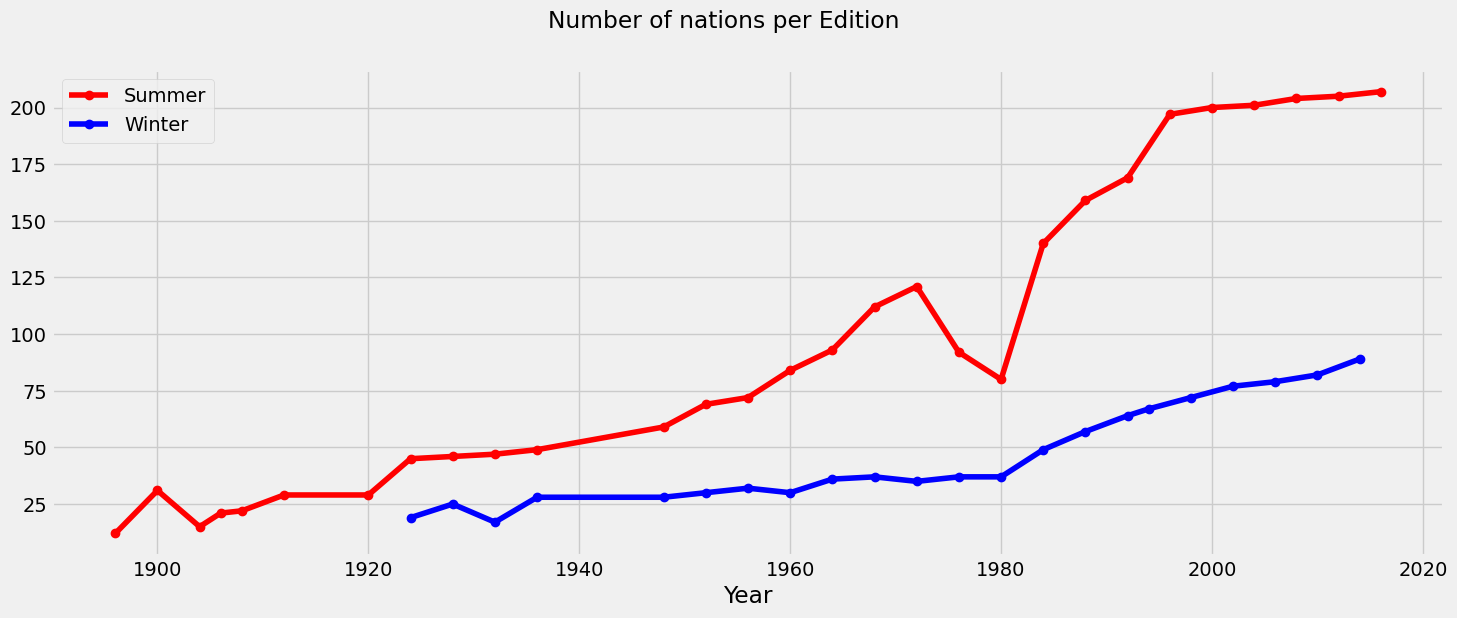

In [92]:
### Le nombre de Pays representer pour chaque edition
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
jo_ete.groupby("Year")["NOC"].nunique().plot(ax=ax,colormap="hsv",marker="o",label="Summer")
jo_hiver.groupby("Year")["NOC"].nunique().plot(ax=ax,colormap="winter",marker="o",label="Winter")
fig.suptitle("Number of nations per Edition")
ax.legend()
ax.annotate("Invasion de l'Afghanisatant", xy=(1970, 1990), xycoords="data", fontsize = 15)


In [93]:
### Nombre de discipline representer pour chaque Edition
jo_ete.groupby("Year")["Event"].nunique()
jo_hiver.groupby("Year")["Event"].nunique()
data7=pd.merge(jo_ete.groupby("Year")["Event"].nunique(),jo_hiver.groupby("Year")["Event"].nunique(),on="Year")
data7.rename(columns={"Event_x":"Event_ete","Event_y":"Event_hiver"},inplace=True)
data7

Event_ete  Event_hiver
Year                        
1924        131           17
1928        122           14
1932        131           14
1936        150           17
1948        153           22
1952        149           22
1956        151           24
1960        150           27
1964        163           34
1968        172           35
1972        193           35
1976        198           37
1980        203           38
1984        221           39
1988        237           46
1992        257           57

###2.Nombre d’hommes et de femmes au fil du temps

<Axes: xlabel='Year'>

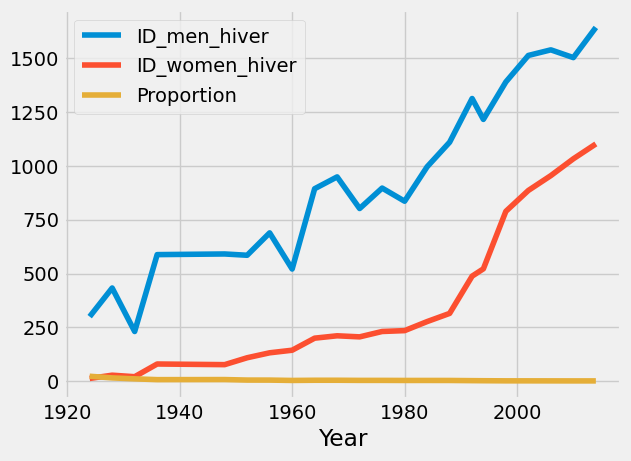

In [94]:

### Pour les jeux d'hiver
jo_hiver_men=jo_hiver[jo_hiver["Sex"]=="M"]
jo_hiver_women=jo_hiver[jo_hiver["Sex"]=="F"]
### Pour les jeux d'ete
jo_ete_men=jo_ete[jo_ete["Sex"]=="M"]
jo_ete_women=jo_ete[jo_ete['Sex']=="F"]

### Le nombre d'Homme et de femme au fil du temps pour les jeux d'Hiver
jo_hiver_men.groupby("Year")["ID"].nunique()
jo_hiver_women.groupby("Year")["ID"].nunique()
data8=pd.merge(jo_hiver_men.groupby("Year")["ID"].nunique(),jo_hiver_women.groupby("Year")['ID'].nunique(),on="Year")
data8.rename(columns={"ID_x":"ID_men_hiver","ID_y":"ID_women_hiver"},inplace=True)
data8["Proportion"]=data8["ID_men_hiver"]/data8["ID_women_hiver"]
data8.plot()

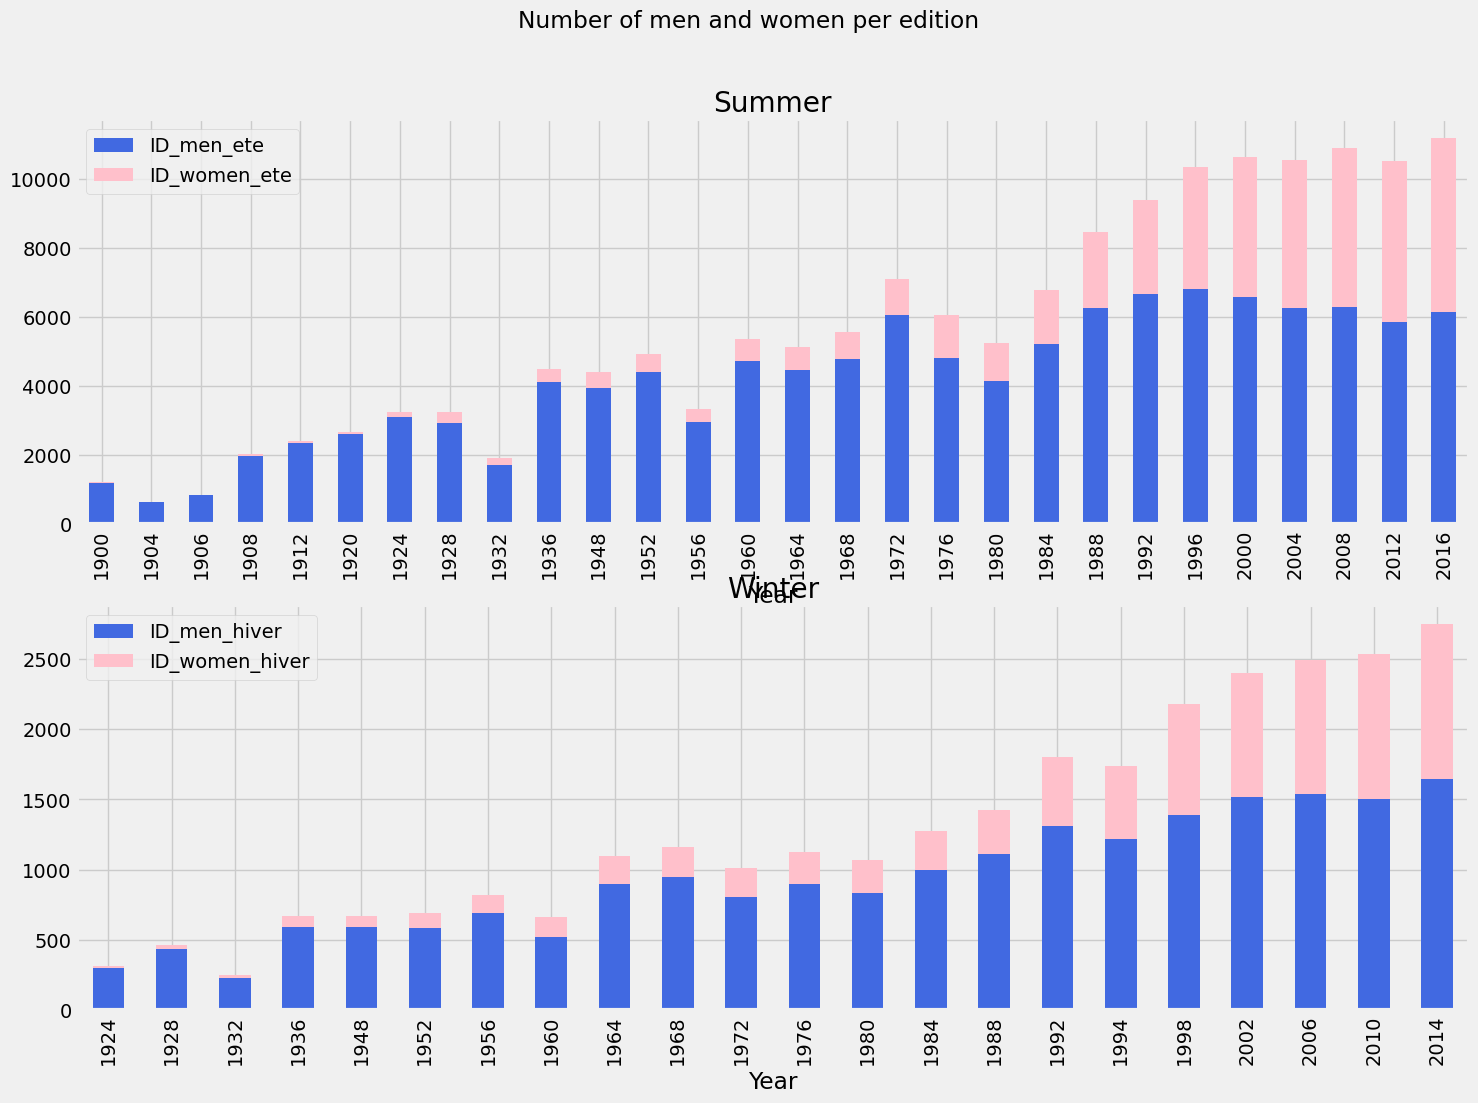

In [95]:

### On continue d'etudier cette evolution avec la separation ete/hiver
### Separation entre homme et femme pour la visualisation
jo_ete_men=jo_ete[jo_ete["Sex"]=="M"]
jo_ete_women=jo_ete[jo_ete['Sex']=="F"]
jo_hiver_men=jo_hiver[jo_hiver["Sex"]=="M"]
jo_hiver_women=jo_hiver[jo_hiver["Sex"]=="F"]

### Creation de la base graphique et modelisation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 11))
## Premiere base graphique avec les jeux d'ete
jo_ete_men.groupby("Year")["ID"].nunique()
jo_ete_women.groupby("Year")['ID'].nunique()
data9=pd.merge(jo_ete_men.groupby("Year")["ID"].nunique(),jo_ete_women.groupby("Year")['ID'].nunique(),on="Year")
data9.rename(columns={"ID_x":"ID_men_ete","ID_y":"ID_women_ete"},inplace=True)
data9.plot(kind="bar", ax=ax1, stacked=True, color=["royalblue", "pink"], label=["Men", "Women"])

## Deuxieme base graphique avec les jeux d'hiver

jo_hiver_men.groupby("Year")["ID"].nunique()
jo_hiver_women.groupby("Year")["ID"].nunique()
data8=pd.merge(jo_hiver_men.groupby("Year")["ID"].nunique(),jo_hiver_women.groupby("Year")['ID'].nunique(),on="Year")
data8.rename(columns={"ID_x":"ID_men_hiver","ID_y":"ID_women_hiver"},inplace=True)
data8.plot(kind="bar", ax=ax2 , stacked=True , color= ["royalblue","pink"] , label=["Men","Women"])
fig.suptitle("Number of men and women per edition")
ax1.set_title("Summer")
ax1.legend()
ax2.set_title("Winter")
ax2.legend()


## 2.Le nombre de femme par rapport au nombre d'homme selon le pays


In [98]:
### Separation d'homme et de femme qui se trouve dans le dataset
jo_h=jo_all[jo_all["Sex"]=="M"]
jo_f=jo_all[jo_all["Sex"]=="F"]

### Le nombre d'homme et de femme selon les pays
jo_h.groupby("NOC")["ID"].nunique()
jo_f.groupby("NOC")["ID"].nunique()
papa0=pd.merge(jo_h.groupby("NOC")["ID"].nunique(),jo_f.groupby("NOC")["ID"].nunique(),on="NOC")
papa0["Proportion"]=papa0["ID_y"]/papa0["ID_x"]
papa0.rename(columns={"ID_x":"ID_men_all","ID_y":"ID_women_all"},inplace=True)
papa0["Percentage_women"]=papa0["Proportion"]*100 ### Pourcentage de femme dans chaque pays
papa0.sort_values(by="Percentage_women",ascending=False)
###

ID_men_all  ID_women_all  Proportion  Percentage_women
NOC                                                        
TLS           3             5    1.666667        166.666667
KOS           3             5    1.666667        166.666667
BHU           8            13    1.625000        162.500000
CHN        1246          1418    1.138042        113.804173
SKN           9            10    1.111111        111.111111
..          ...           ...         ...               ...
PAK         352            11    0.031250          3.125000
KSA         145             4    0.027586          2.758621
MAL          39             1    0.025641          2.564103
KUW         189             3    0.015873          1.587302
BOH          65             1    0.015385          1.538462

[222 rows x 4 columns]

In [99]:

### Fusion des deux tables groupés
men = jo_all[jo_all["Sex"] == "M"]
men = men.groupby(["Year","NOC"])["ID"].nunique()
women = jo_all[jo_all["Sex"] == "F"]
women = women.groupby(["Year","NOC"])["ID"].nunique()
w_m_ratio = pd.merge(men, women, on=[ "Year","NOC"], how="left")
## Calcul du ratio
w_m_ratio["ratio"] = (w_m_ratio["ID_y"] / (w_m_ratio["ID_x"] + w_m_ratio["ID_y"]) * 100)
w_m_ratio

ID_x  ID_y      ratio
Year NOC                       
1896 AUS     1   NaN        NaN
     AUT     3   NaN        NaN
     DEN     3   NaN        NaN
     FRA    12   NaN        NaN
     GBR    10   NaN        NaN
...        ...   ...        ...
2016 VIE    10  12.0  54.545455
     VIN     2   2.0  50.000000
     YEM     2   1.0  33.333333
     ZAM     5   2.0  28.571429
     ZIM     9  21.0  70.000000

[3279 rows x 3 columns]

In [100]:

# Reset the index to convert 'Year' and 'NOC' from index levels to columns
w_m_ratio_processed = w_m_ratio.reset_index()

# Rename the 'ID_x' and 'ID_y' columns to 'hommes' and 'femmes' for clarity and consistency
w_m_ratio_processed = w_m_ratio_processed.rename(columns={"ID_x": "hommes", "ID_y": "femmes"})

## Limitation du nombre d'entrées en ne gardant que les pays avec plus de 50 représentants par année
w_m_ratio_l = w_m_ratio_processed[(w_m_ratio_processed["hommes"] + w_m_ratio_processed["femmes"]).fillna(0) > 50]

## Limitation du nombre d'entrées en ne gardant que 5 années
years = [1932, 1952, 1972, 1992, 2012]
w_m_ratio_l2 = w_m_ratio_l[w_m_ratio_l.Year.isin(years)]
w_m_ratio_l2

Year  NOC  hommes  femmes      ratio
255   1932  BRA      58     1.0   1.694915
257   1932  CAN     123    21.0  14.583333
266   1932  FRA     104     7.0   6.306306
267   1932  GBR      90    21.0  18.918919
268   1932  GER     156     9.0   5.454545
...    ...  ...     ...     ...        ...
2974  2012  TUR      48    64.0  57.142857
2978  2012  UKR     119   111.0  48.260870
2980  2012  USA     262   268.0  50.566038
2981  2012  UZB      36    17.0  32.075472
2983  2012  VEN      42    26.0  38.235294

[173 rows x 5 columns]

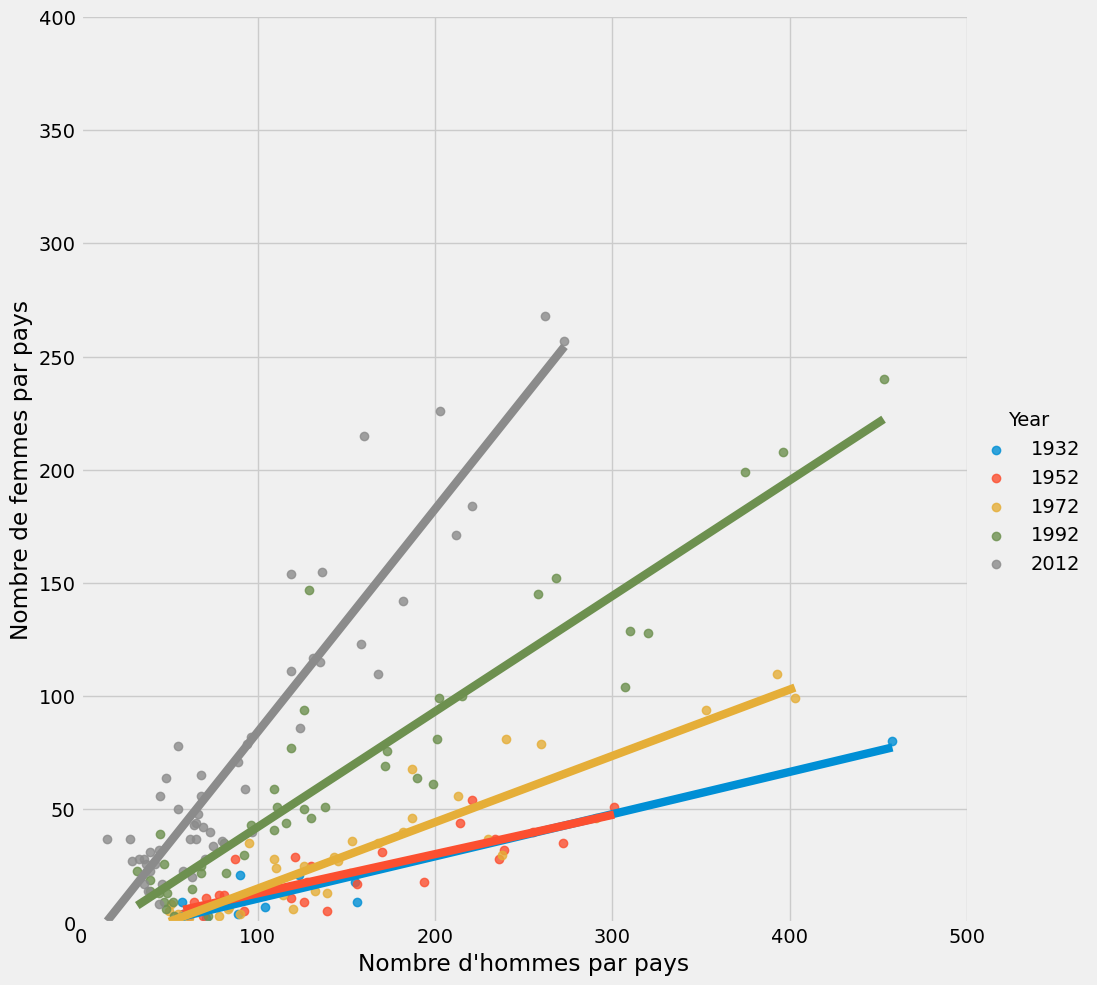

In [101]:
### Affichage des resultats finaux, chaque point represente un pays
g = sns.lmplot(x="hommes", y="femmes", data=w_m_ratio_l2, hue="Year", height=10, ci=None)
g = (g.set_axis_labels("Nombre d'hommes par pays", "Nombre de femmes par pays").set(xlim=(0, 500), ylim=(0, 400)))

## 4.Proportion de femmes dans les equipes olympiques: Année 1936

In [102]:

#### Pour les jeu d'ete et zoom sur l'annee 1936
jo_ete_women[jo_ete_women["Year"]==1936].groupby("NOC")["ID"].nunique()
jo_ete_men[jo_ete_men["Year"]==1936].groupby("NOC")["ID"].nunique()
papa2=pd.merge(jo_ete_women[jo_ete_women["Year"]==1936].groupby("NOC")["ID"].nunique(),jo_ete_men[jo_ete_men["Year"]==1936].groupby("NOC")["ID"].nunique(),on="NOC")
papa2.rename(columns={"ID_x":"ID_women","ID_y":"ID_men"}, inplace=True)
papa2["Proportion"]=(papa2["ID_women"]/(papa2["ID_men"]+papa2["ID_women"]))*100
papa2.sort_values(by="Proportion",ascending=False)
papa2

ID_women  ID_men  Proportion
NOC                              
ARG         1      50    1.960784
AUS         4      28   12.500000
AUT        17     217    7.264957
BEL         5     145    3.333333
BRA         6      67    8.219178
CAN        18      79   18.556701
CHI         1      39    2.500000
CHN         2      52    3.703704
DEN        16     105   13.223140
FIN         5     103    4.629630
FRA        11     190    5.472637
GBR        37     171   17.788462
GER        44     389   10.161663
GRE         1      40    2.439024
HUN        19     197    8.796296
ITA        16     228    6.557377
JPN        19     201    8.636364
LUX         1      48    2.040816
NED        21     144   12.727273
NOR         2      68    2.857143
POL        17     127   11.805556
ROU         2      52    3.703704
RSA         5      27   15.625000
SUI         6     184    3.157895
SWE         8     163    4.678363
TCH        14     176    7.368421
TUR         2      46    4.166667
USA        46     313   12.813370
YUG        15      78   16.129032

In [103]:
#### Pour les jeux d'hiver et zoom sur l'annee 1936
jo_hiver_women[jo_hiver_women["Year"]==1936].groupby("NOC")["ID"].nunique()
jo_hiver_men[jo_hiver_men["Year"]==1936].groupby("NOC")["ID"].nunique()
papa3=pd.merge(jo_hiver_women[jo_hiver_women["Year"]==1936].groupby("NOC")["ID"].nunique(),jo_hiver_men[jo_hiver_men["Year"]==1936].groupby("NOC")["ID"].nunique(),on="NOC")
papa3.rename(columns={"ID_x":"ID_women","ID_y":"ID_men"}, inplace=True)
papa3["Proportion"]=(papa3["ID_women"]/(papa3["ID_men"]+papa3["ID_women"]))*100
papa3.sort_values(by="Proportion",ascending=False)
papa3

ID_women  ID_men  Proportion
NOC                              
AUT        10      50   16.666667
BEL         3      24   11.111111
CAN         7      22   24.137931
ESP         2       4   33.333333
EST         2       3   40.000000
GBR        10      28   26.315789
GER         7      48   12.727273
HUN         3      22   12.000000
ITA         5      35   12.500000
JPN         1      30    3.225806
LAT         3      23   11.538462
NED         1       7   12.500000
NOR         6      25   19.354839
ROU         1      14    6.666667
SUI         4      30   11.764706
SWE         1      31    3.125000
TCH         5      39   11.363636
USA         9      46   16.363636

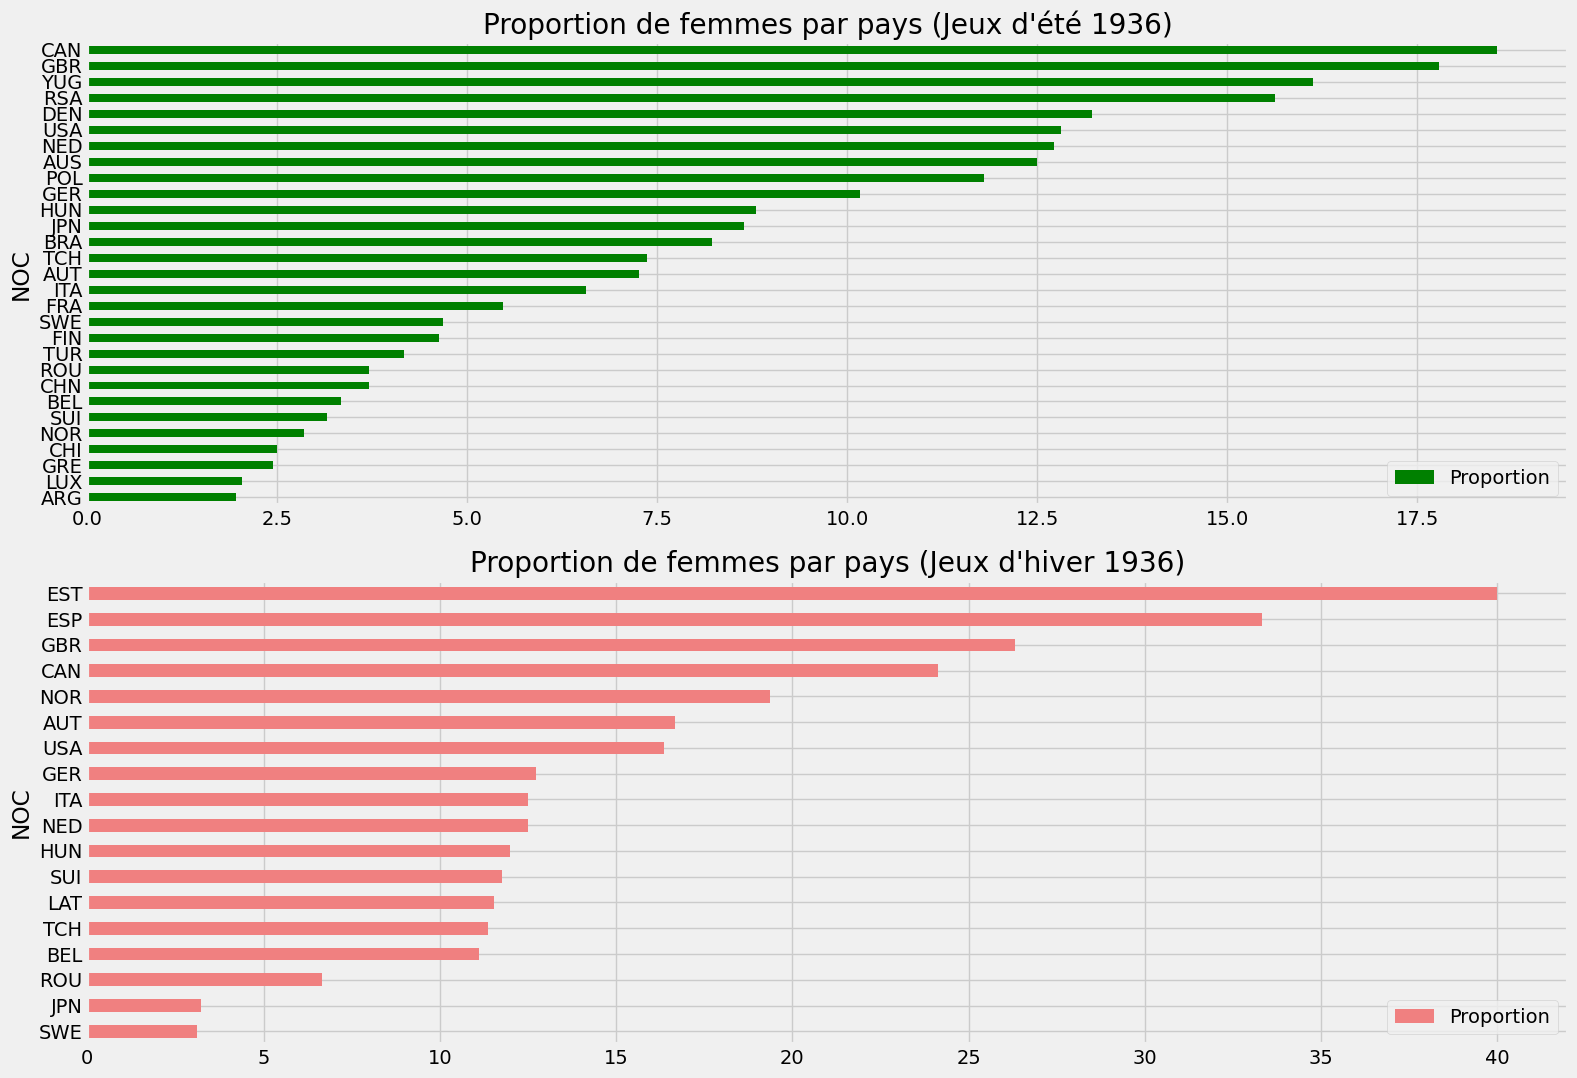

In [104]:
#### Creation de la base graphique et modelisation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 11))

### Premiere base graphique avec les jeux d'ete
jo_ete_women[jo_ete_women["Year"]==1936].groupby("NOC")["ID"].nunique()
jo_ete_men[jo_ete_men["Year"]==1936].groupby("NOC")["ID"].nunique()
papa2.rename(columns={"ID_x":"ID_women","ID_y":"ID_men"}, inplace=True)
x=papa2["Proportion"]=(papa2["ID_women"]/(papa2["ID_men"]+papa2["ID_women"]))*100
x.sort_values(ascending=True).plot(kind="barh", ax=ax1, color=["green"], label="Proportion")

### Deuxieme base graphique avec les jeux d'hiver (assuming papa3 is defined and similar issue)
jo_hiver_women[jo_hiver_women["Year"]==1936].groupby("NOC")["ID"].nunique()
jo_hiver_men[jo_hiver_men["Year"]==1936].groupby("NOC")["ID"].nunique() 
papa3=pd.merge(jo_hiver_women[jo_hiver_women["Year"]==1936].groupby("NOC")["ID"].nunique(),jo_hiver_men[jo_hiver_men["Year"]==1936].groupby("NOC")["ID"].nunique(),on="NOC")
papa3.rename(columns={"ID_x":"ID_women","ID_y":"ID_men"}, inplace=True)
y=papa3["Proportion"]=(papa3["ID_women"]/(papa3["ID_men"]+papa3["ID_women"]))*100
y.sort_values(ascending=True).plot(kind="barh", ax=ax2, color=["lightcoral"], label="Proportion")

ax1.set_title("Proportion de femmes par pays (Jeux d'été 1936)")
ax1.legend()
ax2.set_title("Proportion de femmes par pays (Jeux d'hiver 1936)")
ax2.legend()
fig.tight_layout()

## 5.Nombre de medaille obtenue par les femmes de different pays: 1936

In [105]:

### On reprend le DF JO_all
### Filtre pour ne garder que les femmes
jo_women=jo_all[jo_all["Sex"]=="F"]

### Filtre sur l'annee 1936
jo_women_1936=jo_women[jo_women["Year"]==1936]

jo_women_1936=jo_women_1936[["NOC","Medal"]]

### On supprime les valeurs nuls
jo_women_1936=jo_women_1936.dropna()

### On compte maintenant le nombre de medaille par pays et par type de medille
jo_women_1936=jo_women_1936.groupby(["NOC","Medal"])["Medal"].count()

### Conversion du resultat en DataFrame et renommage de la colonne
jo_women_1936= jo_women_1936.to_frame().rename(columns={"Medal": "total_medals"})

### Reinitialiser l'index pour que NOC et Medal deviennent des colonnes
jo_women_1936 = jo_women_1936.reset_index()
jo_women_1936

NOC   Medal  total_medals
0   ARG  Silver             1
1   AUT  Bronze             1
2   AUT  Silver             1
3   CAN  Bronze             5
4   DEN  Bronze             1
5   DEN  Silver             1
6   GBR  Silver             6
7   GER  Bronze             5
8   GER    Gold            12
9   GER  Silver            10
10  HUN  Bronze             9
11  HUN    Gold             2
12  ITA    Gold             1
13  JPN    Gold             1
14  NED    Gold             7
15  NED  Silver             1
16  NOR  Bronze             1
17  NOR    Gold             1
18  POL  Bronze             1
19  POL  Silver             2
20  SUI    Gold             1
21  SWE  Bronze             2
22  TCH  Silver             8
23  USA  Bronze             8
24  USA    Gold             7
25  USA  Silver             2

<Axes: title={'center': 'Number and type of medals won by women in 1936 by country'}, xlabel='NOC'>

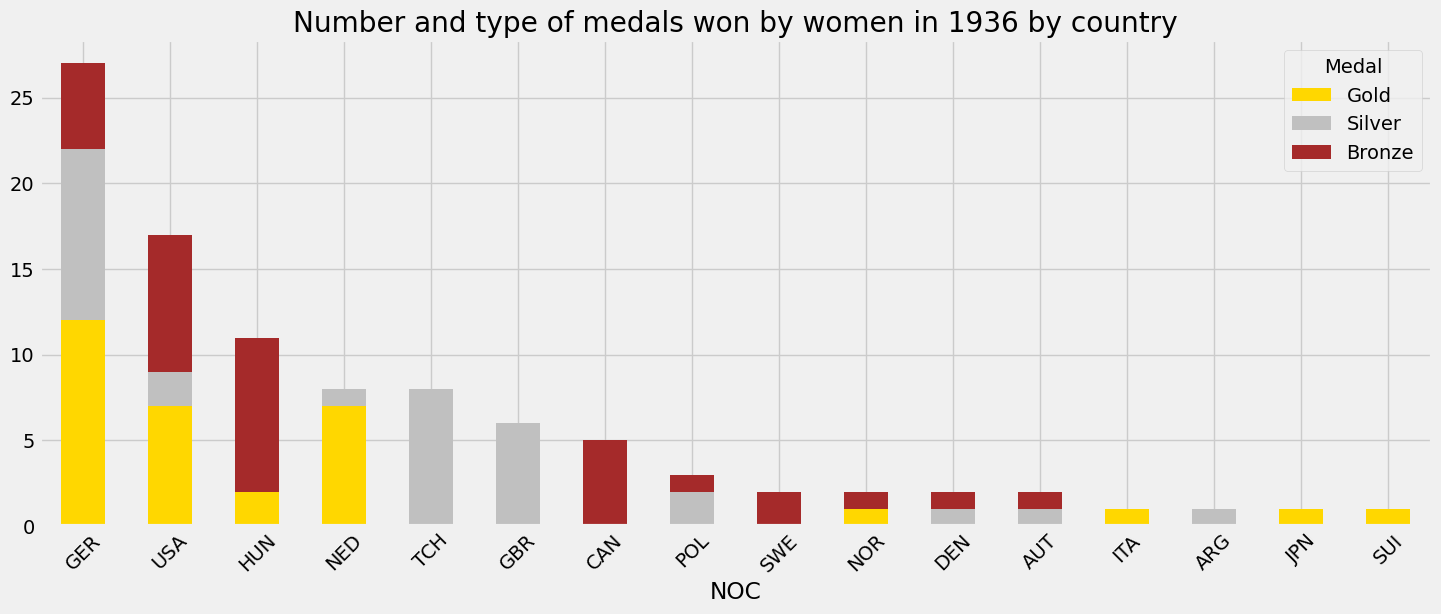

In [106]:
### Transformation du DF en pivot
jo_women_1936_p = jo_women_1936.pivot(index="NOC", columns="Medal", values="total_medals")

### Reorganisation des colonnes
column_order = ["Gold", "Silver", "Bronze"]
jo_women_1936_p = jo_women_1936_p.reindex(column_order, axis=1)
#### Remplacons les valeurs manquantes par 0
jo_women_1936_p = jo_women_1936_p.fillna(0)

### Calcule du nombre totale de medaille
jo_women_1936_p["Total"] = jo_women_1936_p["Gold"] + jo_women_1936_p["Silver"]+ jo_women_1936_p["Bronze"]
### Trie par ordre decroissant du nombre par ordre decroissant
jo_women_1936_p = jo_women_1936_p.sort_values(by="Total", ascending=False)
### Suppressions de la colonne pour qu'elle n'aparaisse pas dans le graphique
jo_women_1936_p = jo_women_1936_p.drop(columns=["Total"])

#### Creation de la base graphique
couleur=["gold","silver","brown"] 
jo_women_1936_p.plot(kind="bar",rot=45,stacked=True,color=couleur,figsize=(16,6),title="Number and type of medals won by women in 1936 by country")

## 6.Proportion de femmes dans les equipes: Annee 1976

In [107]:
#### Revenons toujours sur notre jo_all
### Separation des deux genres
jo_women=jo_all[jo_all["Sex"]=="F"]
jo_men=jo_all[jo_all["Sex"]=="M"]
### Zoom sur l'annee 1976
jo_women_1976=jo_women[jo_women["Year"]==1976]
jo_men_1976 = jo_men[jo_men["Year"] == 1976]
#### Grouper par pays et creation de la proportion
jo_women_1976=jo_women_1976.groupby("NOC")["ID"].nunique()
jo_men_1976=jo_men_1976.groupby("NOC")["ID"].nunique()
papa4=pd.merge(jo_men_1976,jo_women_1976,on="NOC")
papa4.rename(columns={"ID_x":"ID_men","ID_y":"ID_women"},inplace=True)
papa4["Proportion"]=(papa4["ID_women"]/(papa4["ID_men"]+papa4["ID_women"]))*100
papa4.sort_values(by="Proportion",ascending=True)


ID_men  ID_women  Proportion
NOC                              
TUR      35         1    2.777778
IRI      84         4    4.545455
GRE      38         2    5.000000
MEX      92         5    5.154639
YUG     110         6    5.172414
..      ...       ...         ...
LIE      10         5   33.333333
NED      75        40   34.782609
GDR     194       132   40.490798
JAM      11         9   45.000000
FIJ       1         1   50.000000

[65 rows x 3 columns]

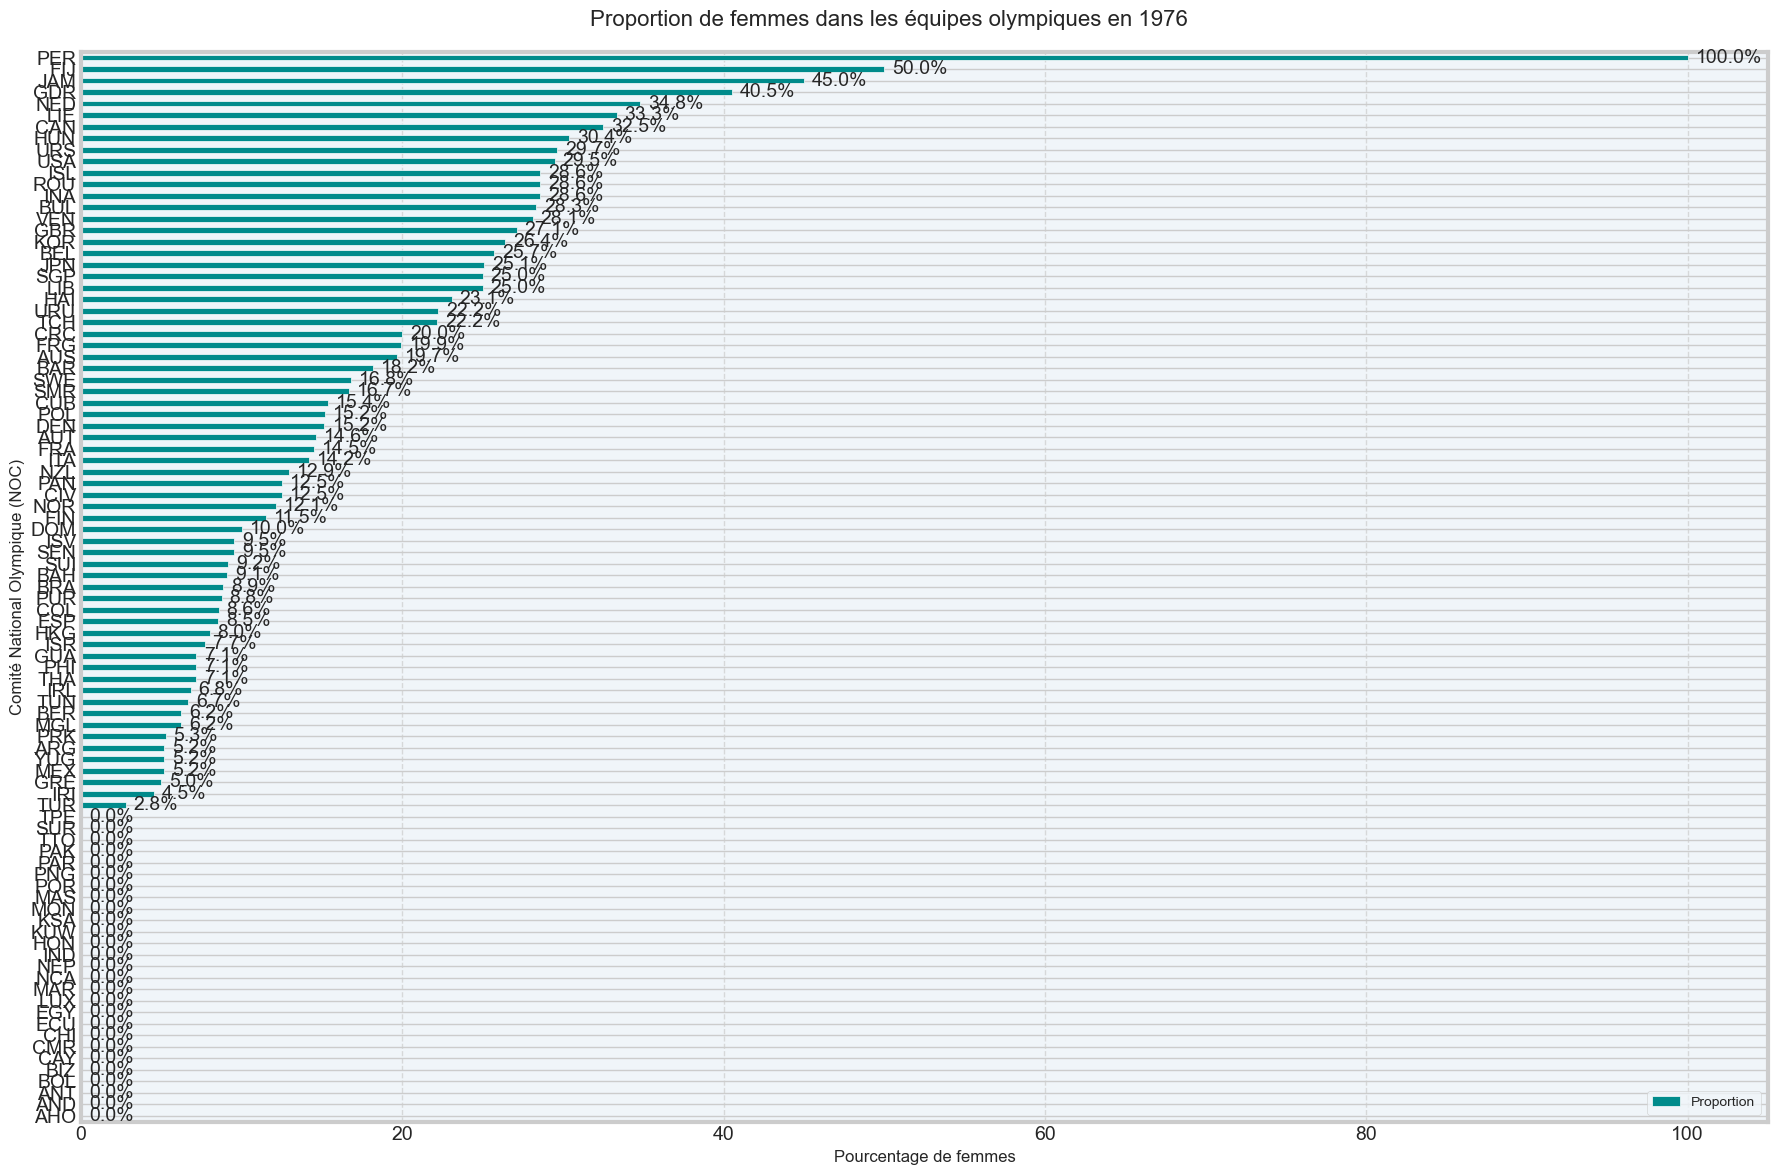

In [132]:
#### Visualisation des resultats obtenues
fig, ax = plt.subplots(1, 1, figsize=(18, 12)) # Augmentation de la taille pour meilleure lisibilité

# Re-filter jo_women and jo_men to ensure they are DataFrames
jo_women_1976_df = jo_women[jo_women["Year"]==1976]
jo_men_1976_df = jo_men[jo_men["Year"]==1976]

# Now perform groupby and nunique on the DataFrames
jo_women_1976_counts = jo_women_1976_df.groupby("NOC")["ID"].nunique()
jo_men_1976_counts = jo_men_1976_df.groupby("NOC")["ID"].nunique()
papa4=pd.merge(jo_men_1976_counts,jo_women_1976_counts,on="NOC",how="outer") # Utilisation de outer join pour inclure tous les NOCs
papa4.rename(columns={"ID_x":"ID_men","ID_y":"ID_women"},inplace=True)

# Remplacer les NaN par 0 avant le calcul de la proportion pour les pays sans hommes/femmes
papa4 = papa4.fillna(0)

papa4["Proportion"]=(papa4["ID_women"]/(papa4["ID_men"]+papa4["ID_women"]))*100
papa4_sorted = papa4.sort_values(by="Proportion",ascending=True)

# Suppression des lignes où la somme est 0 (aucun athlète)
papa4_sorted = papa4_sorted[ (papa4_sorted['ID_men'] + papa4_sorted['ID_women']) > 0]

# REMOVED: papa4_sorted = papa4_sorted[papa4_sorted['Proportion'] > 0] to show all countries

# Création du graphique à barres horizontales
bars = papa4_sorted["Proportion"].plot(kind="barh",ax=ax,color="darkcyan",label="Proportion")

# Ajout des labels de données sur les barres
for bar in bars.patches:
    ax.text(bar.get_width() + 0.5, # Positionnement x légèrement à droite de la barre
            bar.get_y() + bar.get_height() / 2, # Positionnement y au centre de la barre
            f'{bar.get_width():.1f}%', # Formatage du texte
            va='center') # Alignement vertical

fig.suptitle("Proportion de femmes dans les équipes olympiques en 1976", fontsize=16)
ax.set_xlabel("Pourcentage de femmes", fontsize=12)
ax.set_ylabel("Comité National Olympique (NOC)", fontsize=12)
ax.legend(fontsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7.Nombre de médailles obtenues par les femmes de différents pays : année 1976

In [110]:

### Re-filter the original DataFrame to get women's data for 1976 with the 'Medal' column
jo_women_1976_medals = jo_all[(jo_all["Sex"]=="F") & (jo_all["Year"]==1976)]

### Suppression des valeurs manquantes
jo_women_1976_medals = jo_women_1976_medals[["NOC", "Medal"]].dropna()

#### Compter le nombre total de medail par pays et par type de medaille
jo_women_1976_medals= jo_women_1976_medals.groupby(["NOC","Medal"])["Medal"].count()

### Renommage de la colonne valeur
jo_women_1976_medals=jo_women_1976_medals.to_frame()
jo_women_1976_medals=jo_women_1976_medals.rename(columns={"Medal":"total_medals"})
jo_women_1976_medals

### Mise en place d'index par defaut
jo_women_1976_medals = jo_women_1976_medals.reset_index("NOC")
jo_women_1976_medals=jo_women_1976_medals.reset_index("Medal")
jo_women_1976_medals
#

Medal  NOC  total_medals
0   Silver  AUT             1
1   Bronze  BUL            13
2     Gold  BUL             5
3   Silver  BUL             7
4   Bronze  CAN            14
5     Gold  CAN             1
6   Silver  CAN             2
7     Gold  FIN             1
8   Silver  FIN             5
9   Bronze  FRA             1
10  Silver  FRA             5
11  Bronze  FRG             4
12    Gold  FRG             4
13  Silver  FRG             7
14  Bronze  GDR            21
15    Gold  GDR            54
16  Silver  GDR            36
17  Bronze  HUN            21
18    Gold  HUN             1
19  Silver  HUN             2
20  Silver  ITA             3
21    Gold  JPN            12
22  Bronze  KOR            12
23  Bronze  LIE             1
24  Bronze  NED             2
25  Silver  NED             1
26  Bronze  NOR             1
27    Gold  POL             1
28  Bronze  ROU             7
29    Gold  ROU             3
30  Silver  ROU             7
31    Gold  SUI             1
32  Silver  SUI             2
33  Silver  SWE             1
34  Bronze  TCH             1
35  Bronze  URS            27
36    Gold  URS            55
37  Silver  URS            38
38  Bronze  USA            20
39    Gold  USA            10
40  Silver  USA            30

<Axes: title={'center': 'Number and type of medals won by women in 1976 by country'}, xlabel='NOC'>

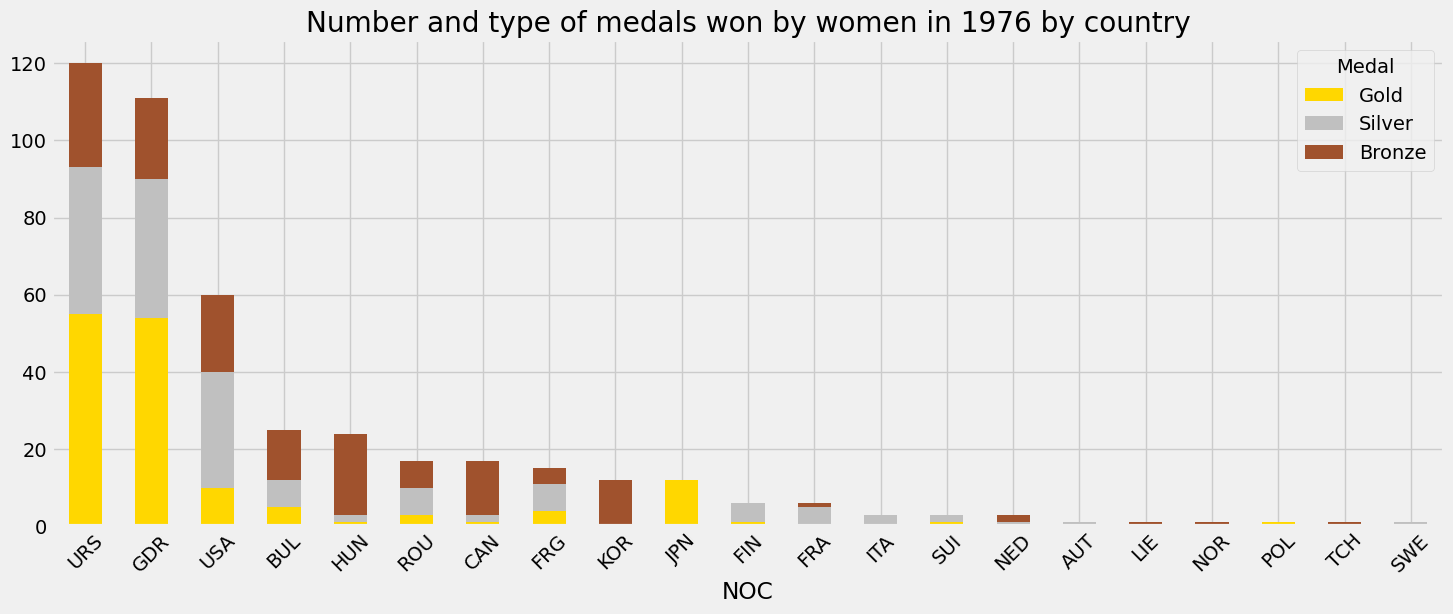

In [111]:
### Mise en place de la base graphique
### Transformation du DF en pivot
jo_women_1976_medals_p=jo_women_1976_medals.pivot(index="NOC",columns="Medal",values="total_medals")
jo_women_1976_medals_p
### Reorganisation des valeurs manquantes
column_order=["Gold","Silver","Bronze"]
jo_women_1976_medals_p=jo_women_1976_medals_p.reindex(column_order,axis=1)
### Remplacement des valeurs manquantes
jo_women_1976_medals_p=jo_women_1976_medals_p.fillna(0)
### Calculons le nombre totale de medaille
jo_women_1976_medals_p["Total"]=jo_women_1976_medals_p["Gold"]+jo_women_1976_medals_p["Silver"]+jo_women_1976_medals_p["Bronze"]
### Trions ce resultat par ordre decroissant
jo_women_1976_medals_p=jo_women_1976_medals_p.sort_values(by="Total",ascending=False)
jo_women_1976_medals_p
### Supprimons la colonne Total afin qu'elle n'apparaisse pas dans le graphique
jo_women_1976_medals_p=jo_women_1976_medals_p.drop(columns=["Total"],axis=1)
### Mise en place du graphique

colors = ["gold", "silver", "sienna"]
jo_women_1976_medals_p.plot(kind="bar", stacked=True, rot=45,color=colors, figsize=(16, 6), title="Number and type of medals won by women in 1976 by country")

C:\Users\pc\AppData\Local\Temp\ipykernel_81984\2421718969.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.index, y=top_5_countries['Total'], palette='viridis')


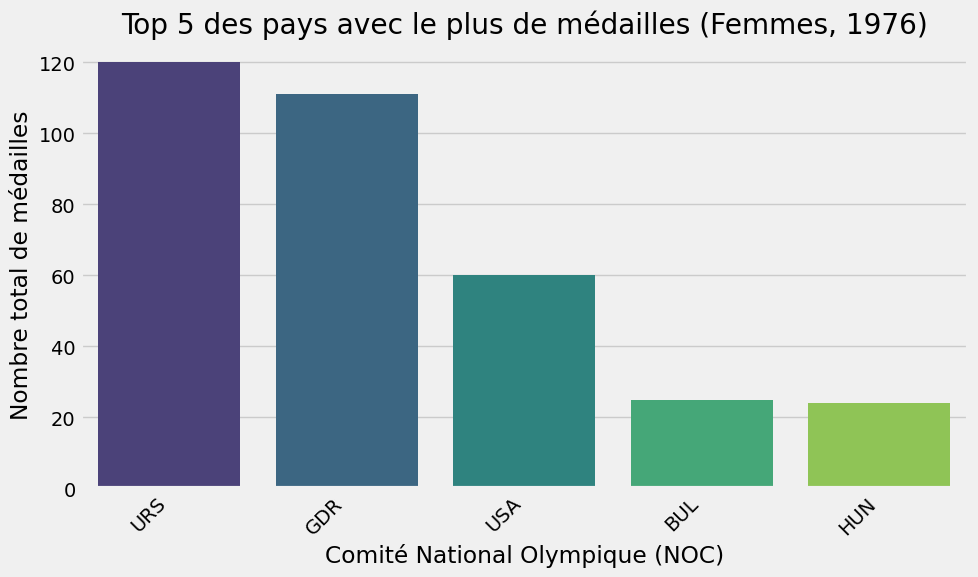

In [113]:
### Top 5 des pays avec le plus de medailles Feminine
# Recalculer la colonne 'Total' car elle a été supprimée après le tracé précédent
jo_women_1976_medals_p["Total"] = jo_women_1976_medals_p["Gold"] + jo_women_1976_medals_p["Silver"] + jo_women_1976_medals_p["Bronze"]
top_5_countries = jo_women_1976_medals_p.sort_values(by="Total",ascending=False).head(5)
top_5_countries = top_5_countries.drop(columns=["Total"])

import matplotlib.pyplot as plt
import seaborn as sns

# Recalculate 'Total' if it was dropped for plotting
top_5_countries['Total'] = top_5_countries['Gold'] + top_5_countries['Silver'] + top_5_countries['Bronze']

# Create a simple bar chart for the top 5 countries based on total medals
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries['Total'], palette='viridis')
plt.title('Top 5 des pays avec le plus de médailles (Femmes, 1976)')
plt.xlabel('Comité National Olympique (NOC)')
plt.ylabel('Nombre total de médailles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8.Taille des athletes au fil du temps ?

<Axes: title={'center': 'Percentage of complete values from total entries per Year'}, xlabel='Year'>

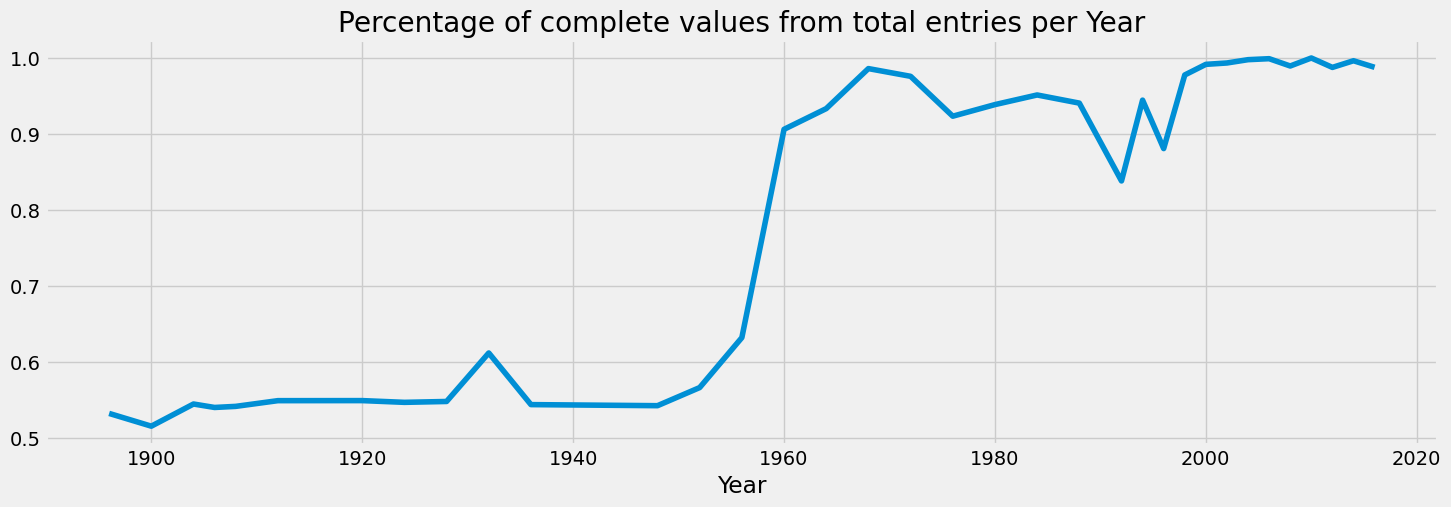

In [114]:
Height_jo=jo_all[["Height","Year","Season","Sex"]]
Height_jo
###  Trouvons les valeurs nulles
Height_null=Height_jo[Height_jo["Height"].isnull()]
### Transformons les valeurs manquantes en 0
Height_null=Height_null.fillna(0)
Height_null=Height_null.groupby("Year")["Height"].size()

### Trouvons maintenant les valeurs reels
Height_reel=Height_jo[Height_jo["Height"]!=0]
Height_reel=Height_reel.groupby("Year")["Height"].size()

### Relation entre les deux
Height_ratio= Height_reel/(Height_reel+Height_null)

### Creation de la base graphique
fig , ax = plt.subplots(1,1,figsize=(16,5))
Height_ratio.plot(ax=ax , title="Percentage of complete values from total entries per Year")

Text(0.5, 1.0, 'Athlete height over time')

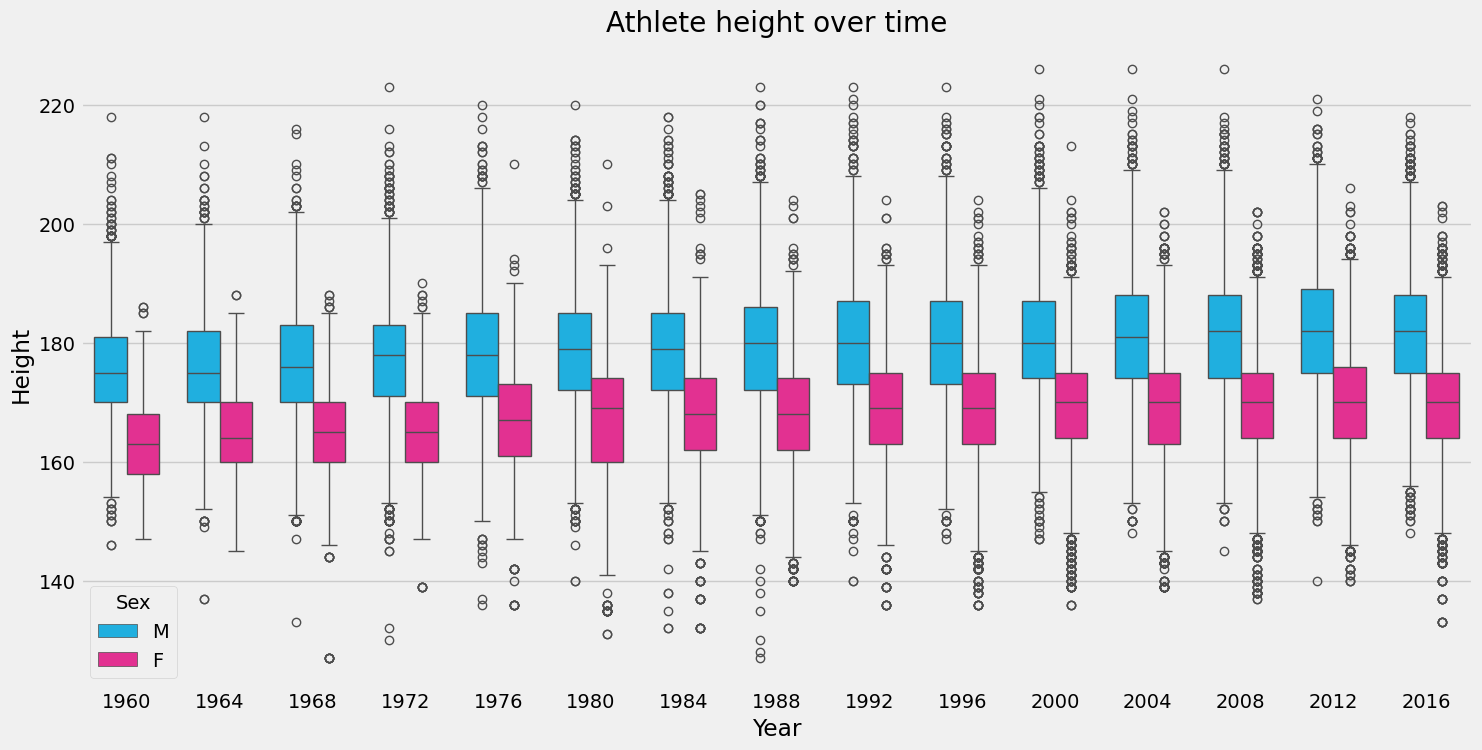

In [115]:
### Par consequent,penchons nous sur la periode de 1960 ainsi que sur la periode d'ete 
Height_jo_1960=Height_jo[(Height_jo["Year"]>=1960) & (Height_jo["Season"]=="Summer")]
Height_jo_1960 

### Prenons uniquement les valeurs reels 
Height_jo_1960=Height_jo_1960[Height_jo_1960["Height"]!=0] 

### Modelisation  
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(16,8))

colors = ["deepskyblue",  "deeppink"]
sns.boxplot(x="Year", y="Height", hue="Sex", data=Height_jo_1960, palette=colors, ax=ax, width=0.7)
ax.set_title("Athlete height over time")


## 9. Poids des athelètes au fil du temps 

<Axes: xlabel='Year'>

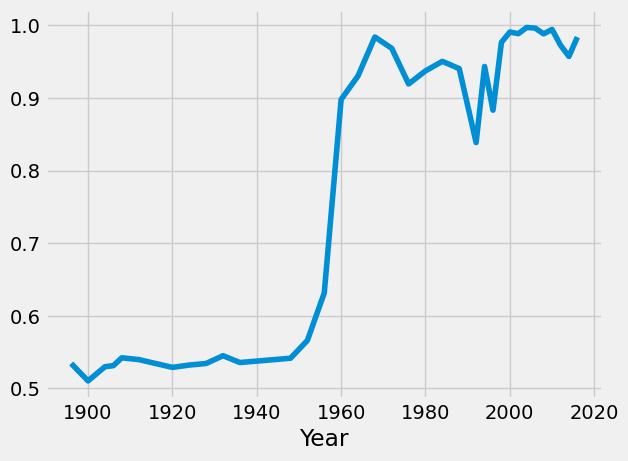

In [116]:
### Concentrons nous toujours sur les colonnes les plus pertinentes 
Weight_jo=jo_all[["Weight","Sex","Year","Season"]]  
### Trouvons les valeurs manquantes  
Weight_jo_null=Weight_jo[Weight_jo["Weight"].isna()] 
### Transformation de ces valeurs en nulles 
Weight_jo_null.fillna(0) 
Weight_jo_null=Weight_jo_null.groupby("Year")["Weight"].size() 
### trouvons les valeurs reels  
Weight_jo_reel=Weight_jo[Weight_jo["Weight"]!=0] 
Weight_jo_reel=Weight_jo_reel.groupby("Year")["Weight"].size() 
### Faisons la ration 
Weigh_jo_ratioo=Weight_jo_reel/(Weight_jo_reel+Weight_jo_null) 
### Mise en place du graphique 
Weigh_jo_ratioo.plot()

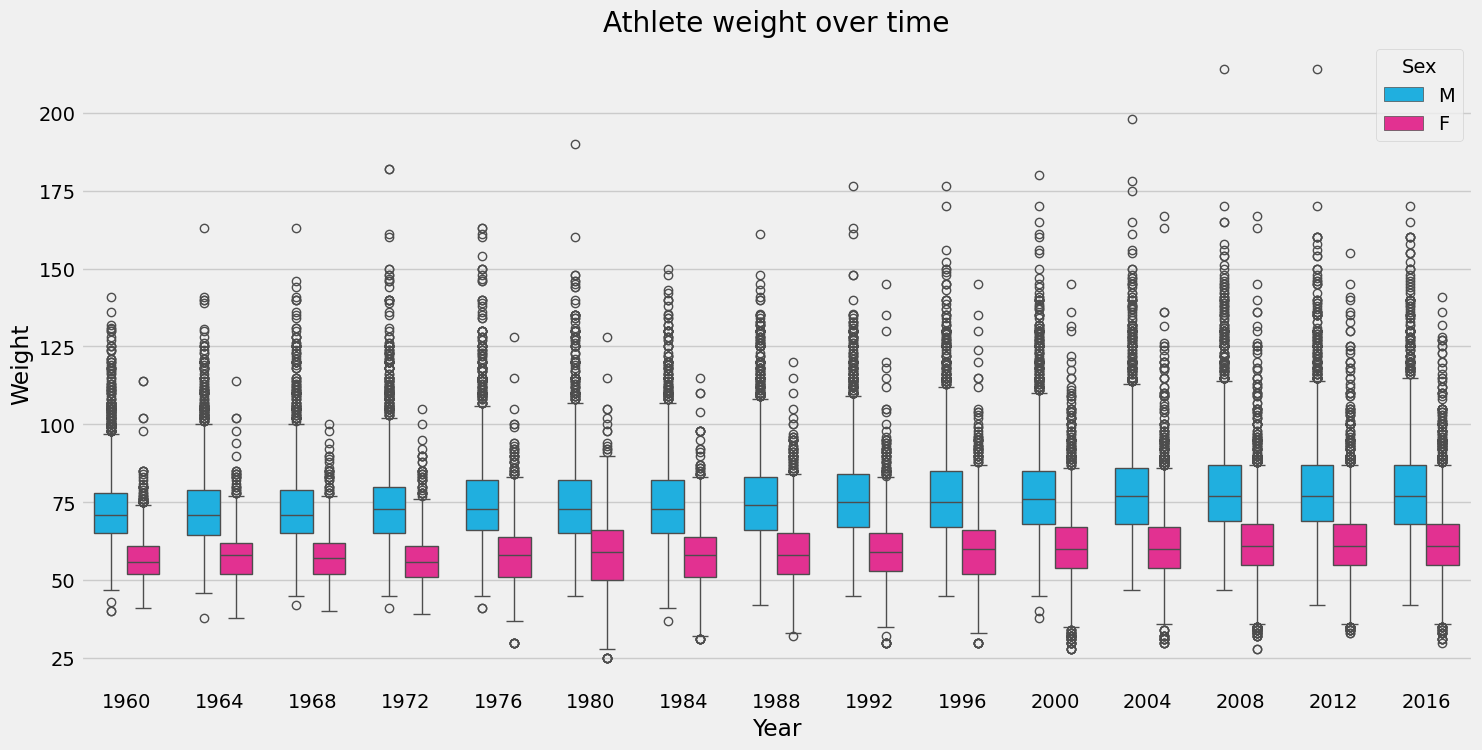

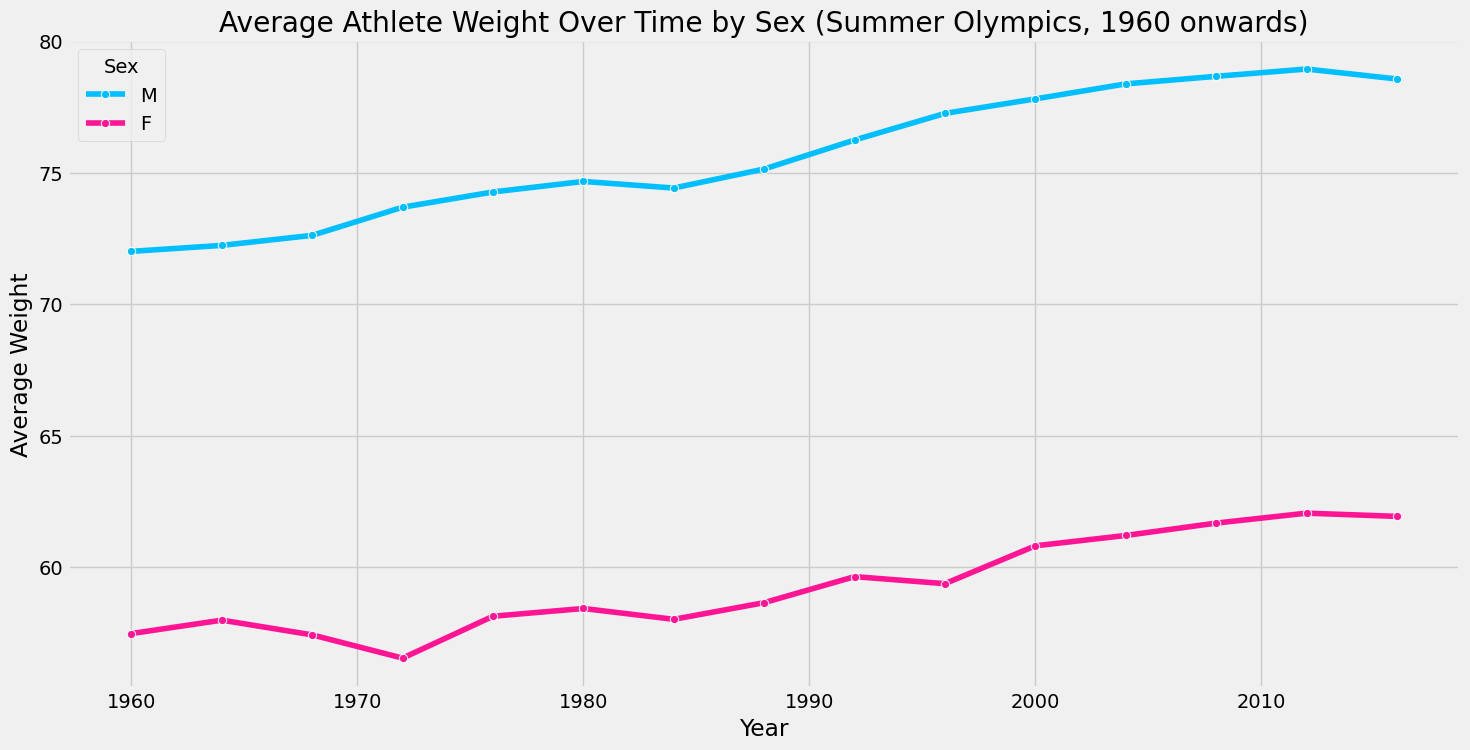

In [117]:
### On voit qu'a partir de 1960 la tendance commence a changer, on va se concentrer sur ca et sur les jeux d'ete 
Weight_jo_1960=Weight_jo[(Weight_jo["Year"]>=1960)  & (Weight_jo["Season"]=="Summer")] 
### Supprimons les valeurs nulles pour ne pas corrompre les données 
Weight_jo_1960=Weight_jo_1960[Weight_jo_1960["Weight"]!=0] 

### Mise en place de la modelisation 
plt.style.use('fivethirtyeight') 
fig, ax = plt.subplots(figsize=(16,8))

colors = ["deepskyblue",  "deeppink"]
sns.boxplot(x="Year", y="Weight", hue="Sex", data=Weight_jo_1960, palette=colors, ax=ax, width=0.7)
ax.set_title("Athlete weight over time") 

### Autre visualisation: Ligne Plot de la moyenne de poids par genre au fil du temps
plt.figure(figsize=(16, 8))
sns.lineplot(x="Year", y="Weight", hue="Sex", data=Weight_jo_1960, estimator='mean', errorbar=None, palette=colors, marker='o')
plt.title("Average Athlete Weight Over Time by Sex (Summer Olympics, 1960 onwards)")
plt.xlabel("Year")
plt.ylabel("Average Weight")
plt.grid(True)
plt.show() 

# 11. Afficher le nombre de participation de l'athlète d'ID 5 

In [118]:
#### On va faire ca en deux etapes, pour les jeux d'hiver et d'ete 
### Pour les jeux d'ete 
ID_5_ete=jo_ete[jo_ete["ID"]==5]  

### Pour les jeux d'hiver 
ID_5_hiver=jo_hiver[jo_hiver["ID"]==5] 
ID_5_hiver.groupby("Year")["Games"].value_counts()

Year  Games      
1988  1988 Winter    2
1992  1992 Winter    2
1994  1994 Winter    2
Name: count, dtype: int64

# 12. Trouver tout les athlètes du pays USA 

In [119]:
### Trouver tous les athlètes du Pays USA

# Filter the main DataFrame to get only athletes from the USA
athlète_USA = jo_all[jo_all['NOC'] == 'USA']

print("First 5 rows of athlète_USA DataFrame:")
print(athlète_USA.head())

print("\nShape of athlète_USA DataFrame:")
print(athlète_USA.shape)

print("\nUnique values in the 'NOC' column of athlète_USA DataFrame:")
print(athlète_USA['NOC'].unique())

First 5 rows of athlète_USA DataFrame:
    ID             Name Sex   Age  Height  Weight           Team  NOC  \
10   6  Per Knut Aaland   M  31.0   188.0    75.0  United States  USA   
11   6  Per Knut Aaland   M  31.0   188.0    75.0  United States  USA   
12   6  Per Knut Aaland   M  31.0   188.0    75.0  United States  USA   
13   6  Per Knut Aaland   M  31.0   188.0    75.0  United States  USA   
14   6  Per Knut Aaland   M  33.0   188.0    75.0  United States  USA   

          Games  Year  Season         City                 Sport  \
10  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
11  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
12  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
13  1992 Winter  1992  Winter  Albertville  Cross Country Skiing   
14  1994 Winter  1994  Winter  Lillehammer  Cross Country Skiing   

                                                Event Medal  
10           Cross Country Skiing Men's 10 kilometr

# 13. Tout les athlètes qui ont obtenues une medaille 

In [120]:
### ON revient sur notre JO_all
### On choisit uniquement ceux qui ont obtenue une medaille
ahtlètes_medal=jo_all[jo_all["Medal"].notna()]
athlete_5_participation = ahtlètes_medal.groupby("ID")["Medal"].value_counts()
athlete_5_participation
### Comptons le nombre total de medaille par ID et par pays 
medals_by_country_and_type = ahtlètes_medal.groupby(["ID","NOC","Medal"])["Medal"].count() 
medals_by_country_and_type 
### Transformation en DF 
medals_by_country_and_type = medals_by_country_and_type.to_frame() 
medals_by_country_and_type 
### Renommons la colonne 
medals_by_country_and_type.rename(columns={"Medal":"total_medals"},inplace=True) 
medals_by_country_and_type.sort_values(by="total_medals",ascending=False)

total_medals
ID     NOC Medal               
94406  USA Gold              23
33557  USA Gold              10
67046  URS Gold               9
87390  FIN Gold               9
69210  USA Gold               9
...                         ...
135553 URS Gold               1
           Silver             1
135554 POL Bronze             1
135563 RUS Bronze             1
135508 RUS Bronze             1

[33928 rows x 1 columns]

C:\Users\pc\AppData\Local\Temp\ipykernel_81984\1983723887.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atheltes_unique.index, y=atheltes_unique.values, palette=colors)


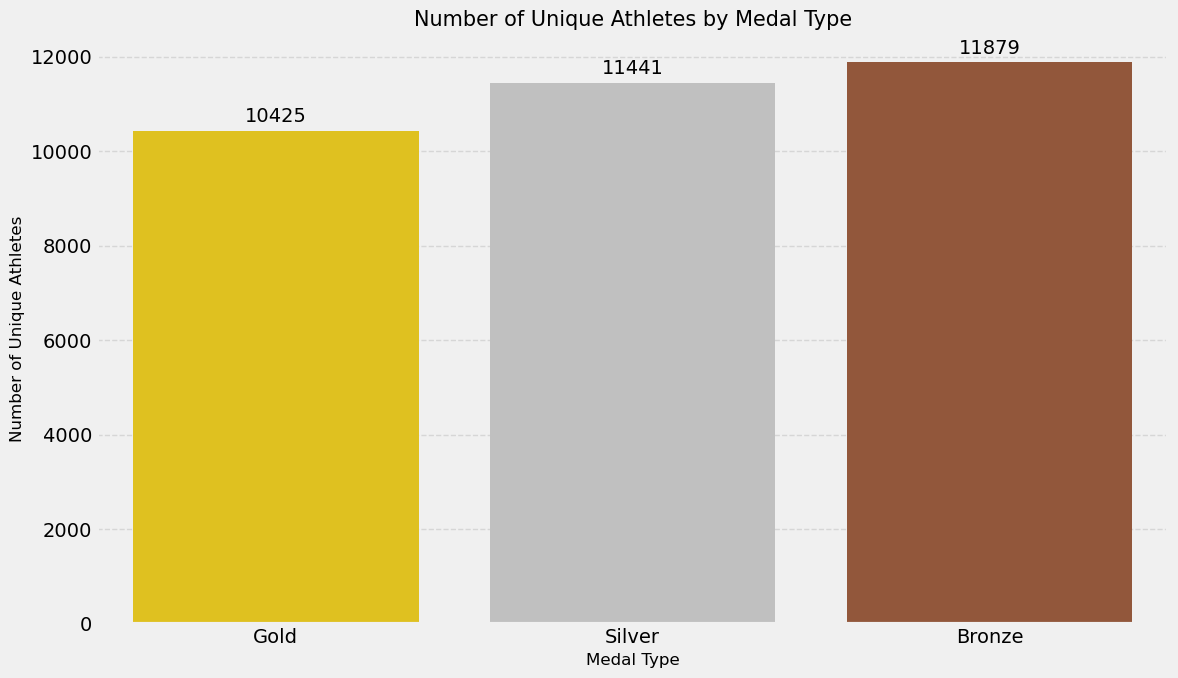

In [121]:
### On peut aller beaucoup plus en profondeur en comptant le nombre totale d'athlète pour chaque type de medaille
### Les medailles sans valeus manquantes
ahtlètes_medal = jo_all[jo_all["Medal"].notna()]
### Les athlètes d'ID unique
atheltes_unique = ahtlètes_medal.groupby("Medal")["ID"].nunique()

### Definissons les couleurs en fonctions des colonnes 
medal_order = ["Gold", "Silver", "Bronze"]
colors = ["gold", "silver", "sienna"]

# Reindex atheltes_unique to ensure the desired order for plotting
atheltes_unique = atheltes_unique.reindex(medal_order)

### Mise en place de la base graphique avec Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x=atheltes_unique.index, y=atheltes_unique.values, palette=colors)

plt.title('Number of Unique Athletes by Medal Type', fontsize=15)
plt.xlabel('Medal Type', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of the bars
for index, value in enumerate(atheltes_unique.values):
    plt.text(index, value + 100, str(value), ha='center', va='bottom') # Adjust +100 for better spacing

plt.tight_layout()
plt.show()

# 14. Pour chaque athlètes d'ID unique combien d'epreuve a t il disputé ? 

In [252]:
####### Sur l'experience total: Si l'athlète a fais 3 fois un sport celui ci sera afficher 
### On revient toujours sur notre JO_All 
### On se concentre sur Events qui parait comme les epreuves
### On compte les athlètes d'ID unique 
athl_unique=jo_all["ID"].count() 
athl_unique
# On compte maintenant le nombre de d'epreuve disputer pour chaque athlète 
epreuve_par_ath_1=jo_all.groupby(["ID","Name"])["Event"].count().sort_values(ascending=False) 
epreuve_par_ath_1

ID      Name                        
77710   Robert Tait McKenzie            58
106296  Heikki Ilmari Savolainen        39
115354  Joseph "Josy" Stoffel           38
119591  Ioannis Theofilakis             36
53240   Jean Lucien Nicolas Jacoby      32
                                        ..
135569  Andrzej ya                       1
135568  Olga Igorevna Zyuzkova           1
135566  James Francis "Jim" Zylker       1
135564  Yevgeny Aleksandrovich Zykov     1
135562  Milan Zyka                       1
Name: Event, Length: 135571, dtype: int64

In [253]:
#### Pour la polyvalence: C'est a dire pour une epreuve meme si l'athlète l'a fait 3x ca sera compter comme 1 
epreuve_par_ath_2=jo_all.groupby(["ID","Name"])["Event"].nunique().sort_values(ascending=False)  
epreuve_par_ath_2.head(10) 

ID      Name                                    
119591  Ioannis Theofilakis                         33
119590  Alexandros Theofilakis                      28
18255   Gustaf Eric Carlberg                        24
18257   Gustaf Vilhelm Carlberg                     22
76886   Frangiskos D. Mavrommatis                   22
124156  Paul Van Asbroeck                           20
81899   Lon Ernest Moreaux                          19
73260   Lars Jrgen Madsen                           19
25946   Marie Joseph "Raoul" le Borgne de Boigne    18
55421   Lon douard Johnson                          18
Name: Event, dtype: int64

# 15. Age Moyen des athlètes au fil du temps 

Age moyen des athlètes au fil du temps : 
Year
1896    23.14
1900    28.27
1904    26.85
1906    25.61
1908    26.86
Name: Age, dtype: float64


Text(0, 0.5, 'Age Moyen')

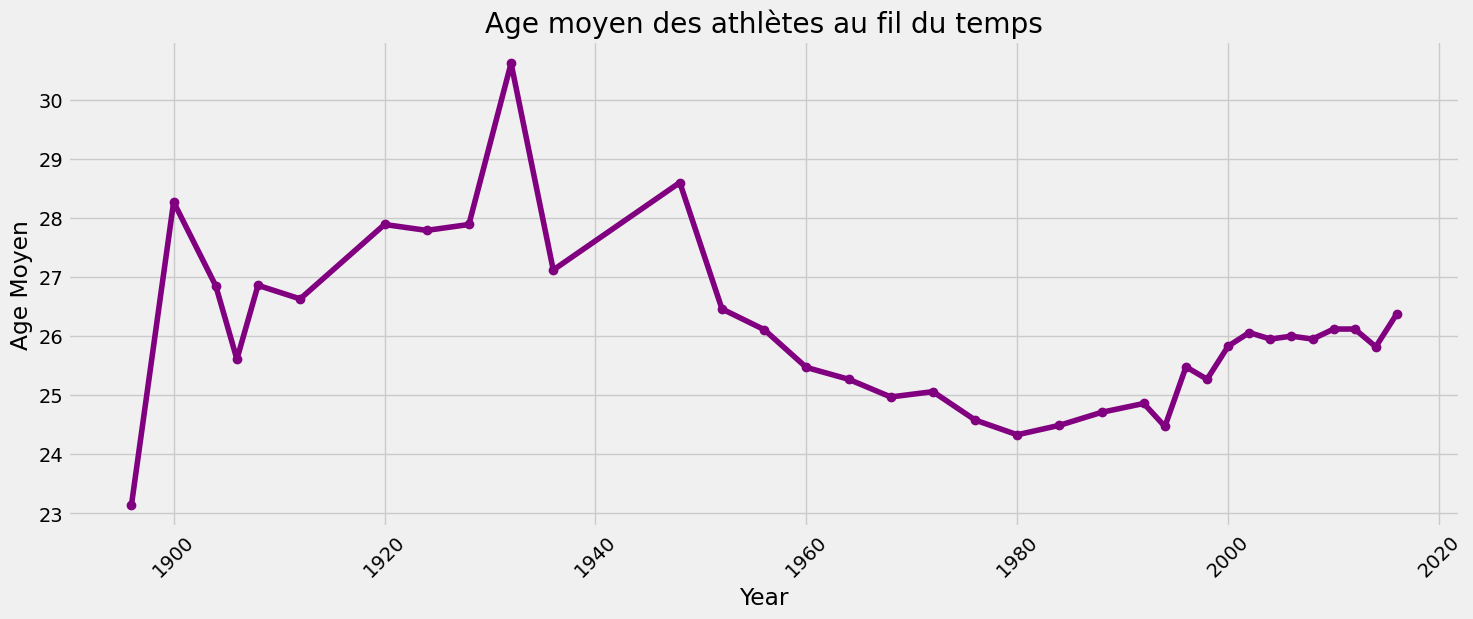

In [122]:
### On va travailler sur notre jo_all 
### Nettoyer les données en supprimant les lignes où l'âge est manquant 
athletes_unique_ID=jo_all.dropna(subset="Age")  
athletes_unique_ID 

### Pour chaque athlète (ID) et chaque année, obtenir une seule valeur d'âge.
#    Cela gère les cas où un athlète peut apparaître plusieurs fois dans la même année
#    pour différents événements, en prenant leur âge pour cette année.
age_moy_annee=athletes_unique_ID.groupby(["Year","ID"])["Age"].first().reset_index() 

### Calcule de la moyenne 
athletes_unique_ID=round(age_moy_annee.groupby("Year")["Age"].mean(),2)  
athletes_unique_ID 
### Affichons les premières valeurs 
print("Age moyen des athlètes au fil du temps : ") 
print(athletes_unique_ID.head()) 

### Mise en place de la base graphique 
fig, ax=plt.subplots(figsize=(16,6))
athletes_unique_ID.plot(kind="line",marker='o', color='purple',rot=45) 
plt.title("Age moyen des athlètes au fil du temps") 
plt.xlabel("Year") 
plt.ylabel("Age Moyen")

Âge moyen des athlètes par sport (Top 15) :
Sport
Roque               53.33
Art Competitions    43.71
Alpinism            38.81
Polo                35.12
Motorboating        34.33
Croquet             32.88
Jeu De Paume        32.45
Equestrianism       32.14
Shooting            31.30
Curling             30.63
Golf                29.88
Cricket             29.33
Skeleton            29.09
Sailing             28.71
Tug-Of-War          28.68
Name: Age, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_81984\812641567.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=age_moyen_par_sport.head(15).values, y=age_moyen_par_sport.head(15).index, palette='viridis')


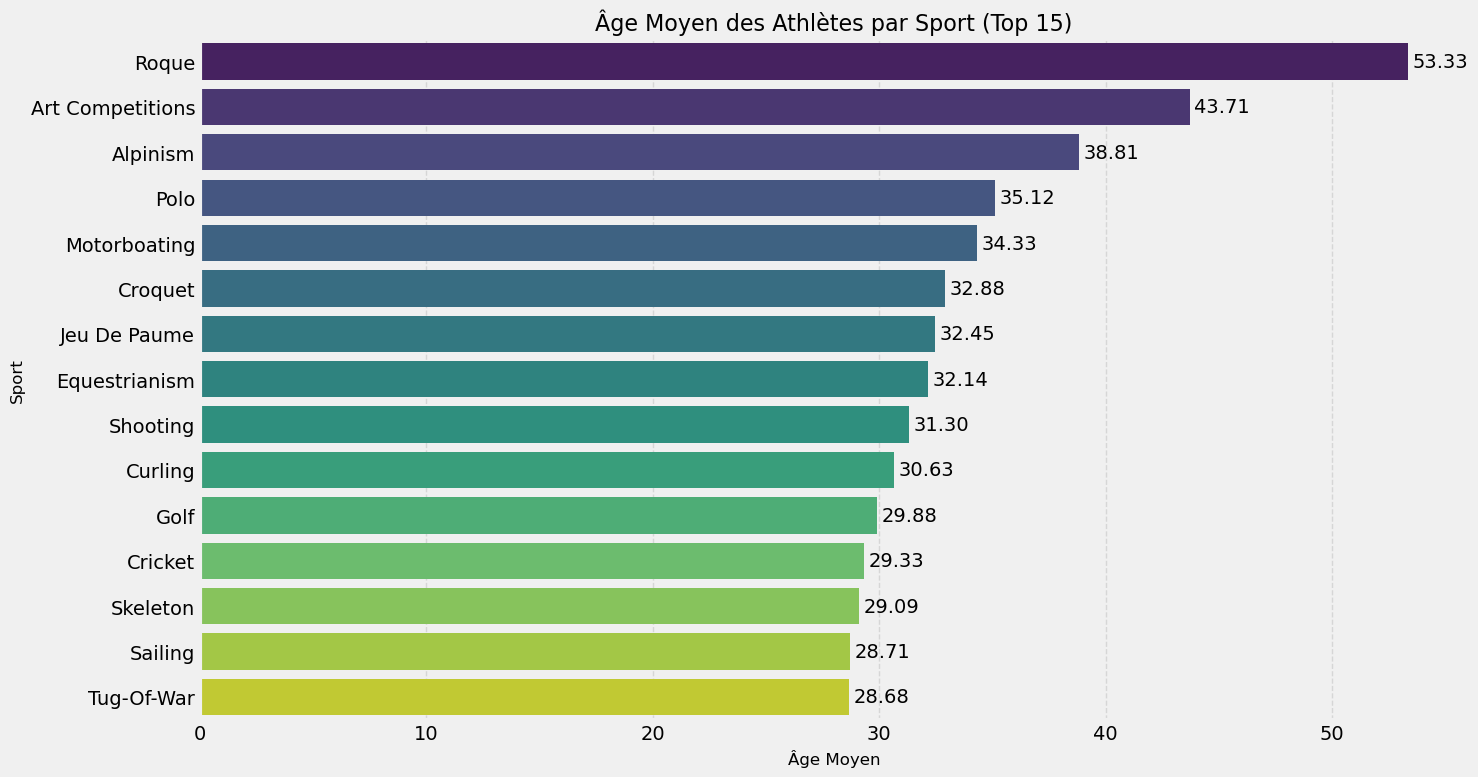

In [123]:
### On peut aller plus en profondeur en trouvant l'age moyen des athlètes par types de sport 
### Tout comme la dernière fois on supprime les données manquantes qui se trouvent au niveau des ages 
age_sport_data = jo_all.dropna(subset=['Age']) 
### Pour chaque athlète (ID) et chaque Sport, obtenir une seule valeur d'âge.
    #Ceci évite de compter le même athlète plusieurs fois pour le même sport dans la même année ou différente année.
athlete_age_per_sport = age_sport_data.groupby(['ID', 'Sport'])['Age'].first().reset_index()

### Calculer l'âge moyen pour chaque sport à partir des âges uniques des athlètes
age_moyen_par_sport = athlete_age_per_sport.groupby('Sport')['Age'].mean().round(2).sort_values(ascending=False) 
age_moyen_par_sport 

print("Âge moyen des athlètes par sport (Top 15) :")
print(age_moyen_par_sport.head(15)) 

### Mise en place de la base graphique 
plt.figure(figsize=(15, 8))
# Using horizontal bar plot (sns.barplot with x and y swapped)
bars = sns.barplot(x=age_moyen_par_sport.head(15).values, y=age_moyen_par_sport.head(15).index, palette='viridis')
plt.title("Âge Moyen des Athlètes par Sport (Top 15)", fontsize=16)
plt.xlabel('Âge Moyen', fontsize=12)
plt.ylabel('Sport', fontsize=12)
# plt.xticks(rotation=75, ha='right') # No need for x-tick rotation with horizontal bars
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 0.2, # Positionnement x légèrement à droite de la barre
             bar.get_y() + bar.get_height() / 2, # Positionnement y au centre de la barre
             f'{bar.get_width():.2f}', # Formatage du texte à deux décimales
             va='center') # Alignement vertical

plt.tight_layout() 
plt.show()


# 16.Dans quel sport la taille moyenne (Height) est-elle la plus élevée ?

La taille moyenne pour chaque sport : 
Sport
Basketball          190.26
Volleyball          186.61
Beach Volleyball    186.07
Water Polo          184.11
Rowing              183.73
Name: Height, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_81984\1368930557.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=height_per_sport.head(15).values, y=height_per_sport.head(15).index, palette='cividis')


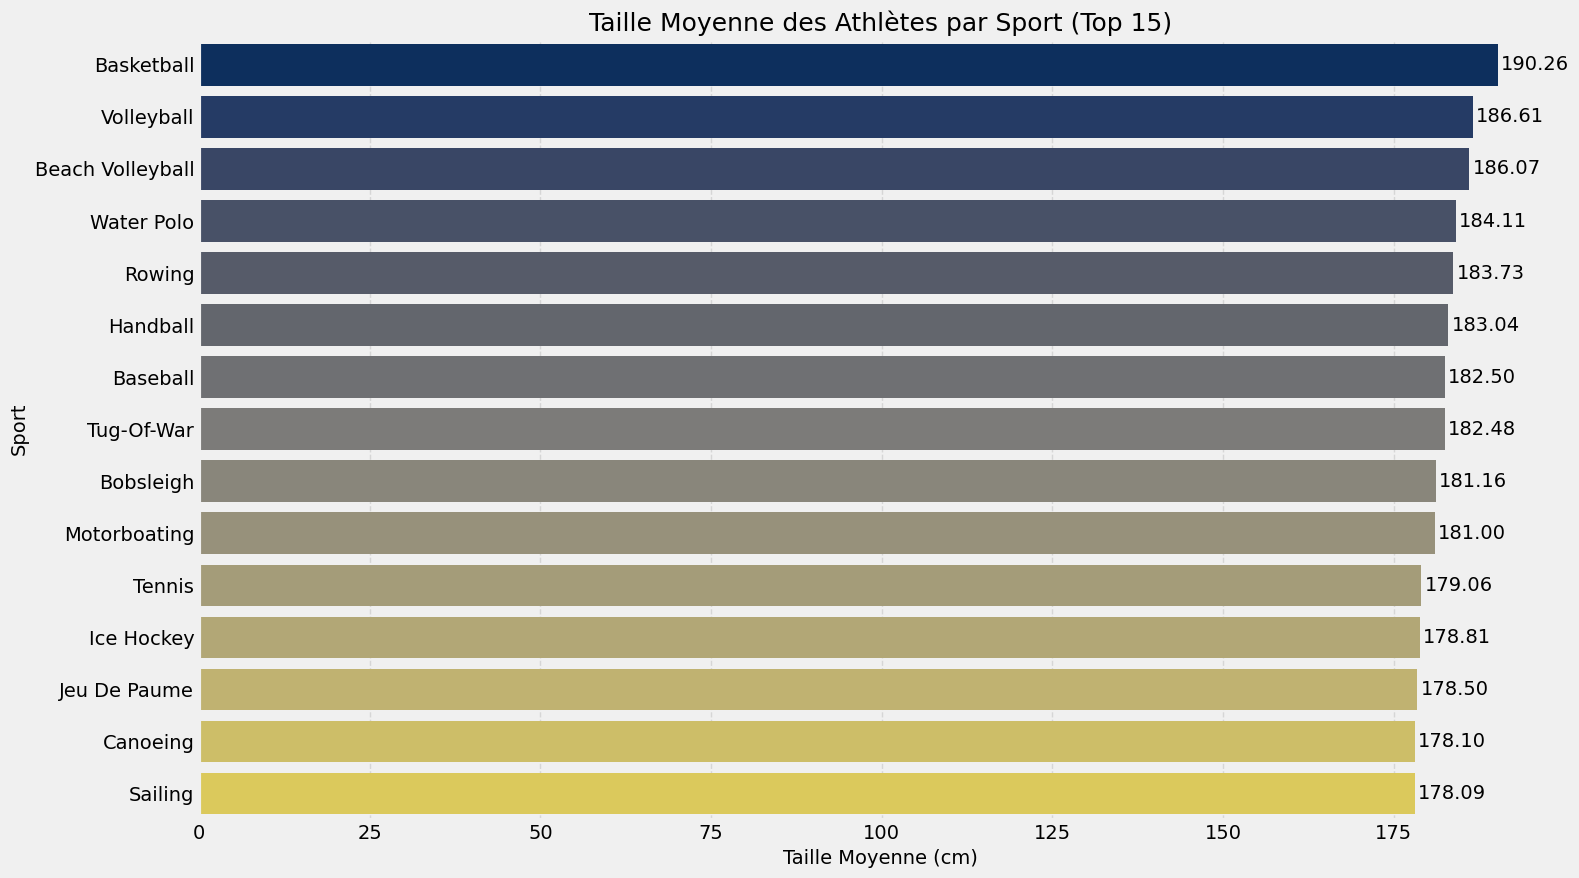

In [124]:
### On revient toujours sur notre JO_ALL 
### On se concentre sur le sport et sur la taille Height 
### On verifie voir les valeurs manquantes  
jo_all["Height"].isna().value_counts() 
### On supprime les valeurs manquantes pour ne pas fausser les resultats 
height_per_sport=jo_all.dropna(subset="Height") 
### Pour chaque athlètes d'ID et chaque sport on obtient une seule valeur de taille 
height_per_sport=height_per_sport.groupby(["ID","Sport"])["Height"].first().reset_index() 
### On calcule maintenant la moyenne de la taille pour chaque sport 
height_per_sport=round(height_per_sport.groupby("Sport")["Height"].mean(),2).sort_values(ascending=False) 
### On affiche les 5 premiers sport avec leurs taille moyenne 
print("La taille moyenne pour chaque sport : ") 
print(height_per_sport.head(5)) 

### Mise en place de la base graphique 
plt.figure(figsize=(16, 9))
# Use seaborn for better aesthetics and ease of use for horizontal bar plots
bars = sns.barplot(x=height_per_sport.head(15).values, y=height_per_sport.head(15).index, palette='cividis')

plt.title("Taille Moyenne des Athlètes par Sport (Top 15)", fontsize=18)
plt.xlabel('Taille Moyenne (cm)', fontsize=14)
plt.ylabel('Sport', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the bars
for bar in bars.patches:
    plt.text(bar.get_width() + 0.5, # Position x slightly to the right of the bar
             bar.get_y() + bar.get_height() / 2, # Center y position on the bar
             f'{bar.get_width():.2f}', # Format text to two decimal places
             va='center') # Vertical alignment

plt.tight_layout()
plt.show()


# 17. Dans quel sport le poids moyen (Weight) est-il le plus élevé ? 

Le poids moyen pour chaque sport : 
Sport
Tug-Of-War          94.87
Bobsleigh           87.81
Baseball            85.33
Basketball          85.04
Water Polo          83.41
Handball            81.02
Ice Hockey          80.41
Rowing              79.34
Rugby Sevens        78.94
Beach Volleyball    78.81
Volleyball          78.50
Weightlifting       78.01
Rugby               77.72
Judo                77.66
Motorboating        77.00
Name: Weight, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_81984\3069797458.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_violint['Sport'] = pd.Categorical(data_violint['Sport'], categories=top_n_sport, ordered=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_81984\3069797458.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Weight', y='Sport', data=data_violint, palette='coolwarm', inner='quartile')


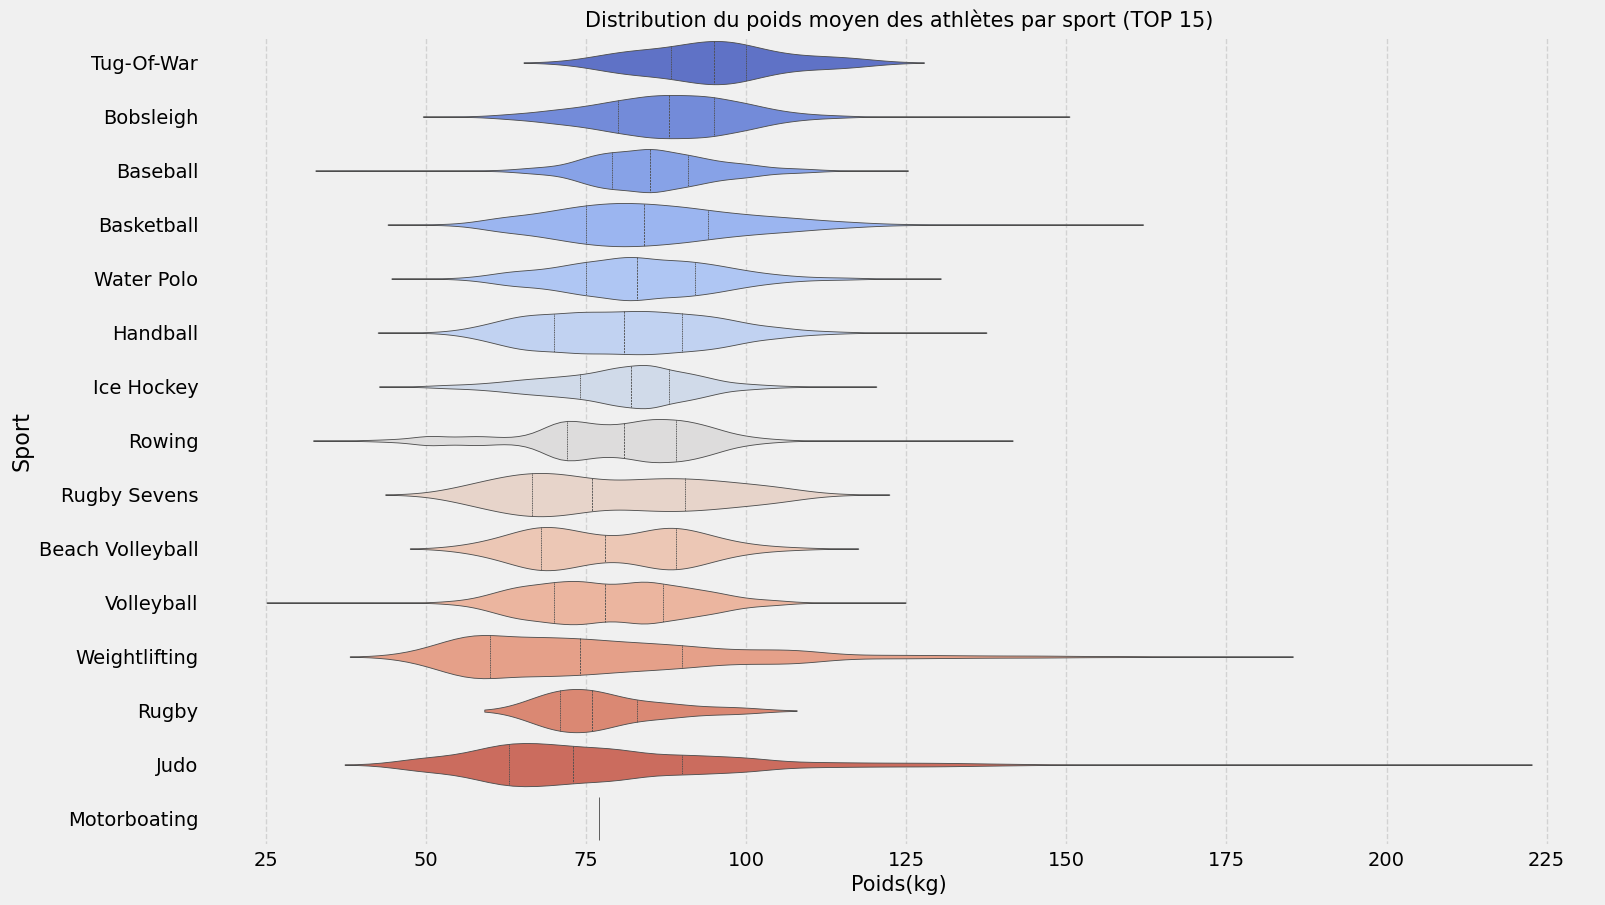

In [125]:
### Meme procedure qu'avec la taille moyenne 
### On remplace tout les Height par Weight  

### On verifie voir les valeurs manquantes  
jo_all["Weight"].isna().value_counts() 

### On supprime les valeurs manquantes pour ne pas fausser les resultats 
height_per_sport=jo_all.dropna(subset="Weight") 

### Pour chaque athlètes d'ID et chaque sport on obtient une seule valeur de taille 
height_per_sport=height_per_sport.groupby(["ID","Sport"])["Weight"].first().reset_index() 

### On calcule maintenant la moyenne de la taille pour chaque sport tout en les triant 
mean_height_per_sport=round(height_per_sport.groupby("Sport")["Weight"].mean(),2).sort_values(ascending=False) 

### On affiche les 5 premiers sport avec leurs taille moyenne 
print("Le poids moyen pour chaque sport : ") 
print(mean_height_per_sport.head(15))   

### On choisit le top N des sports 
top_n_sport=mean_height_per_sport.head(15).index
## Filtrer le DataFrame original (avec les poids uniques par athlète et sport) pour inclure uniquement ces sports 
data_violint=height_per_sport[height_per_sport["Sport"].isin(top_n_sport)] 
## Pour trier les sports sur l'axe y par poids moyen décroissant
data_violint['Sport'] = pd.Categorical(data_violint['Sport'], categories=top_n_sport, ordered=True)   

### Mise en place de la base graphique pour la visualisation du poids par sport, le top 15 
fig, plt.figure(figsize=(16,10)) 
sns.violinplot(x='Weight', y='Sport', data=data_violint, palette='coolwarm', inner='quartile') 
plt.title("Distribution du poids moyen des athlètes par sport (TOP 15)",fontsize=15) 
plt.xlabel("Poids(kg)",fontsize=15)
plt.ylabel("Sport",fontsize=16)
plt.grid(axis="x",linestyle="--",alpha=0.8) 

# 18. Combien d’athlètes par pays (NOC) ont gagné au moins une médaille ?

Les 10 pays avec le plus d'athlètes medaillé : 
NOC
USA    3836
URS    1675
GBR    1601
GER    1518
FRA    1277
ITA    1117
SWE    1108
CAN    1064
AUS     863
RUS     828
Name: ID, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_81984\1609984858.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(x=top_10_pays.index,y=top_10_pays.values,palette=colors_jo)


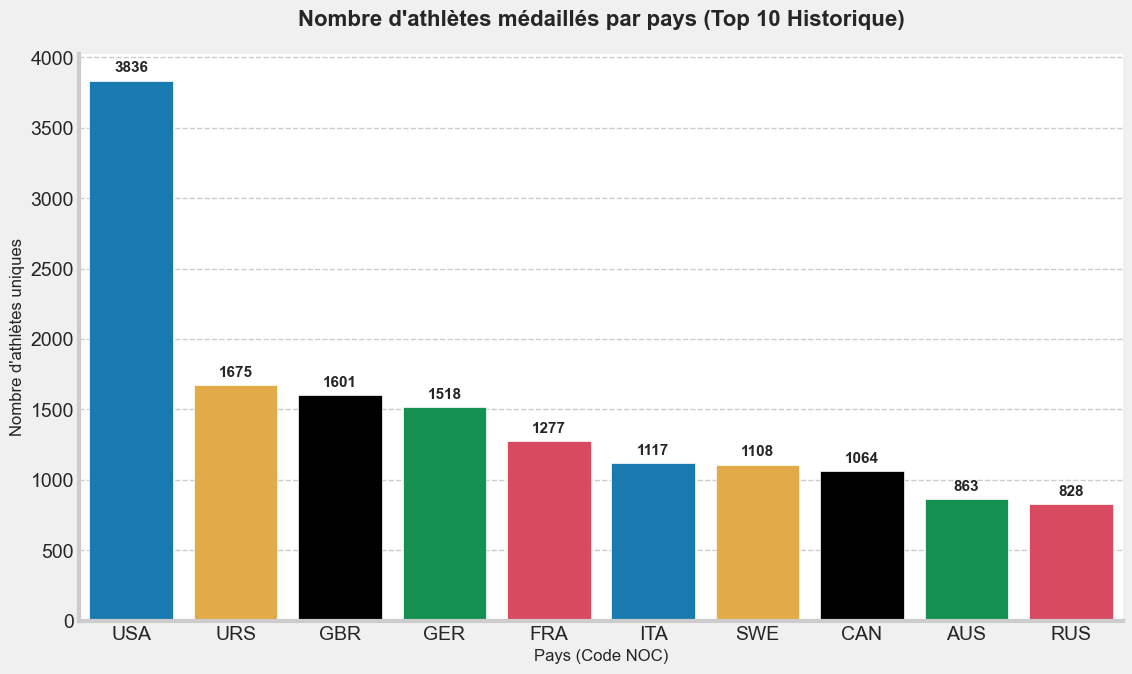

In [126]:
### On revient toujours sur notre jo_all
### On se concentre uniquement sur NOC et les medailles  
### On supprime les lignes sans medailles 
medal_non_nul=jo_all.dropna(subset=["Medal"])
### On doit compter maintenant le nombre d'athlètes pour chaque pays qui ont au moins gagner une medaille 
medal_non_nul.groupby(["NOC"])["ID"].nunique().sort_values(ascending=False) 
top_10_pays = medal_non_nul.groupby("NOC")["ID"].nunique().sort_values(ascending=False).head(10)

print("Les 10 pays avec le plus d'athlètes medaillé : ") 
print(top_10_pays) 

### Mise en place de la base graphique 
### Definition des dfférents couleurs des jeux olympiques 
colors_jo=['#0081C8', '#FCB131', '#000000', '#00A651', '#EE334E'] * 2 
### Creation du graphique
plt.figure(figsize=(12,7)) 
sns.set_style("whitegrid")  

plot=sns.barplot(x=top_10_pays.index,y=top_10_pays.values,palette=colors_jo) 
### Ajout des etiquettes de données( Nombre exacte au dessus des bars )  
for h in plot.patches: 
    plot.annotate(format(h.get_height(), '.0f'),
                 (h.get_x() + h.get_width() / 2., h.get_height()),
                  ha = "center", va = "center", 
                  xytext = (0, 9), 
                  textcoords = 'offset points',
                  fontsize=11, fontweight='bold') 

### Mise en place des titres 
plt.title("Nombre d'athlètes médaillés par pays (Top 10 Historique)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Pays (Code NOC)", fontsize=12)
plt.ylabel("Nombre d'athlètes uniques", fontsize=12)
plt.grid(axis="y",linestyle="--")
# On retire les bordures inutiles pour un look moderne
sns.despine()

plt.show()

# 19. Quel pays (NOC) comptabilise le plus grand nombre de participations toutes années confondues ?

In [127]:
### On revient toujours sur notre DF jo_all
### On va se concentrer uniquement sur les colonnes Games et NOC 
### On enlève les valeurs manquantes dans les 2 colonnes 
noc_year_games=jo_all[["NOC","Games"]]
not_nul_games=noc_year_games.dropna(subset=["NOC","Games"]) 
### On regroupe par pays puis on compte le nombre de participation pour chaque pays 
NOC_participation=not_nul_games.groupby("NOC")["Games"].nunique().sort_values(ascending=False).head(10)    
### On peut le transformer en DataFrame puis le rennomer les colonnes  
NOC_participation.to_frame().rename(columns={"Games":"Nb_Participation"})


Nb_Participation
NOC                  
GBR                51
FRA                51
ITA                51
SUI                51
SWE                50
AUT                50
USA                50
NOR                49
HUN                49
CAN                49

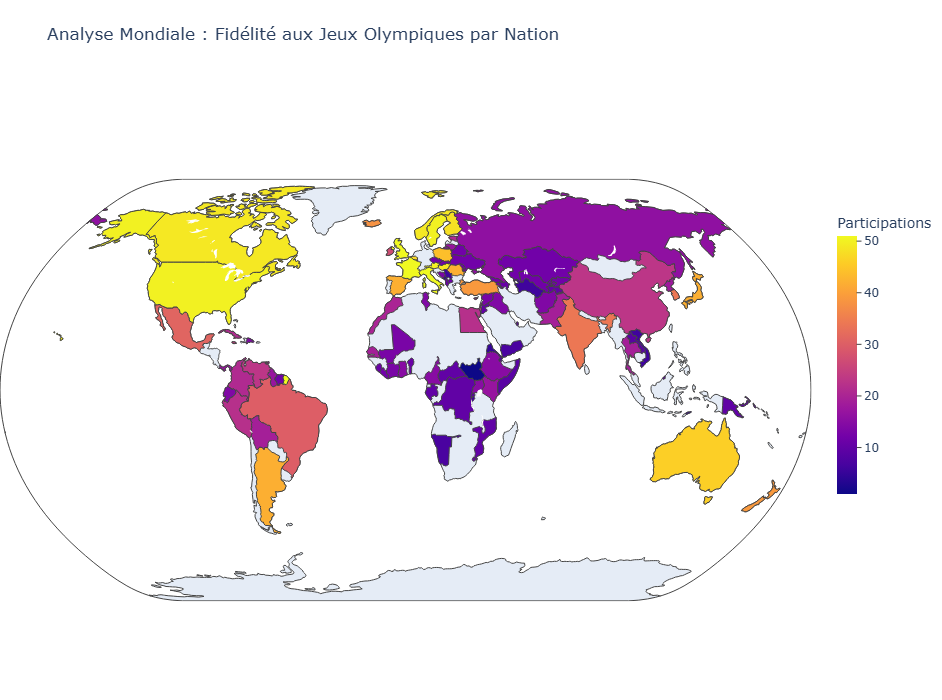

In [128]:
import plotly.express as px

# 1. On prépare les données comme avant
df_map = jo_all.groupby("NOC")["Games"].nunique().reset_index()
df_map.columns = ["NOC", "Participations"]

# 2. Création de la carte avec une échelle de couleur très visuelle
fig = px.choropleth(
    df_map, 
    locations="NOC",
    color="Participations",
    hover_name="NOC", 
    # 'Plasma' ou 'Spectral' donnent des couleurs très distinctes pour chaque niveau
    color_continuous_scale=px.colors.sequential.Plasma, 
    projection="natural earth", # Donne une forme de globe plat plus élégante
    title="Analyse Mondiale : Fidélité aux Jeux Olympiques par Nation"
)

# 3. On personnalise ce qui s'affiche quand on passe la souris
fig.update_traces(
    hovertemplate="<b>Pays: %{hovertext}</b><br>Nombre de participations: %{z}<extra></extra>"
)

# 4. On agrandit la carte pour qu'elle prenne toute la place
fig.update_layout(
    height=700, # Augmente la hauteur de la carte
    margin={"r":0,"t":80,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Participations",
        thicknessmode="pixels", thickness=20,
        lenmode="pixels", len=300,
        yanchor="top", y=0.8,
        ticks="outside"
    )
)

fig.show()

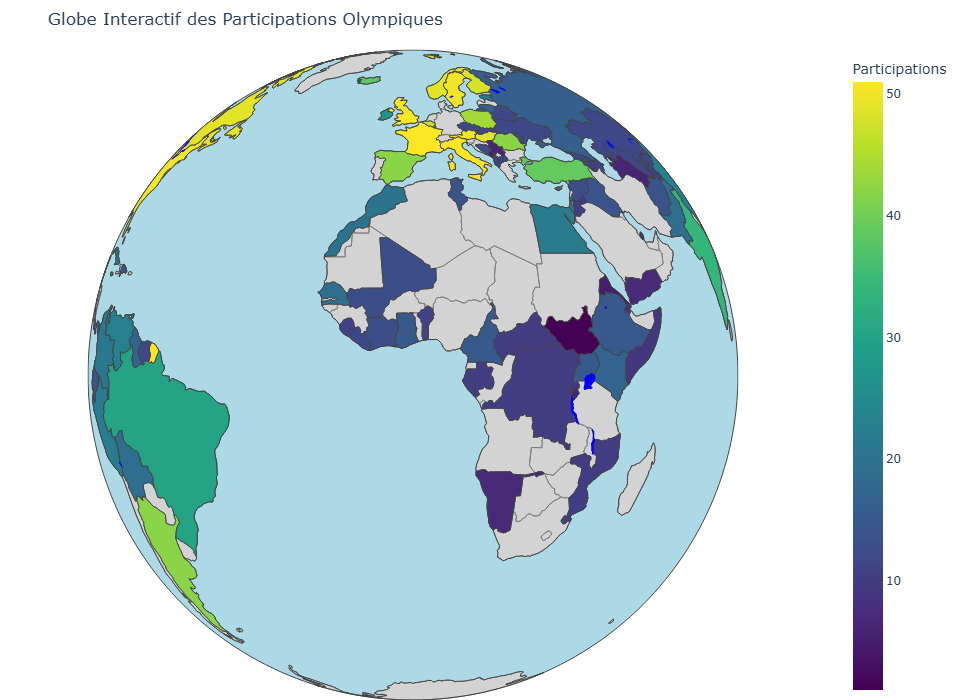

In [129]:
import plotly.express as px

# 1. Préparation des données
df_map = jo_all.groupby("NOC")["Games"].nunique().reset_index()
df_map.columns = ["NOC", "Participations"]

# 2. Création du Globe 3D
fig = px.choropleth(
    df_map, 
    locations="NOC",
    color="Participations",
    hover_name="NOC",
    # C'est ici que la magie opère :
    projection="orthographic", 
    color_continuous_scale="Viridis",
    title="Globe Interactif des Participations Olympiques"
)

# 3. Amélioration du réalisme du globe
fig.update_geos(
    showcountries=True, countrycolor="Grey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showland=True, landcolor="LightGrey"
)

# 4. Personnalisation du design
fig.update_layout(
    height=700,
    margin={"r":0,"t":50,"l":0,"b":0},
    # On ajoute des effets de relief
    coloraxis_colorbar=dict(title="Participations")
)

fig.show()

# 20. Pour un athlète donné (ex : ID=5), comment évoluent ses performances (médailles) au fil des années ?

Medal  Bronze  Gold  Silver
Year                       
2004        2     6       0
2008        0     8       0
2012        0     4       2
2016        0     5       1


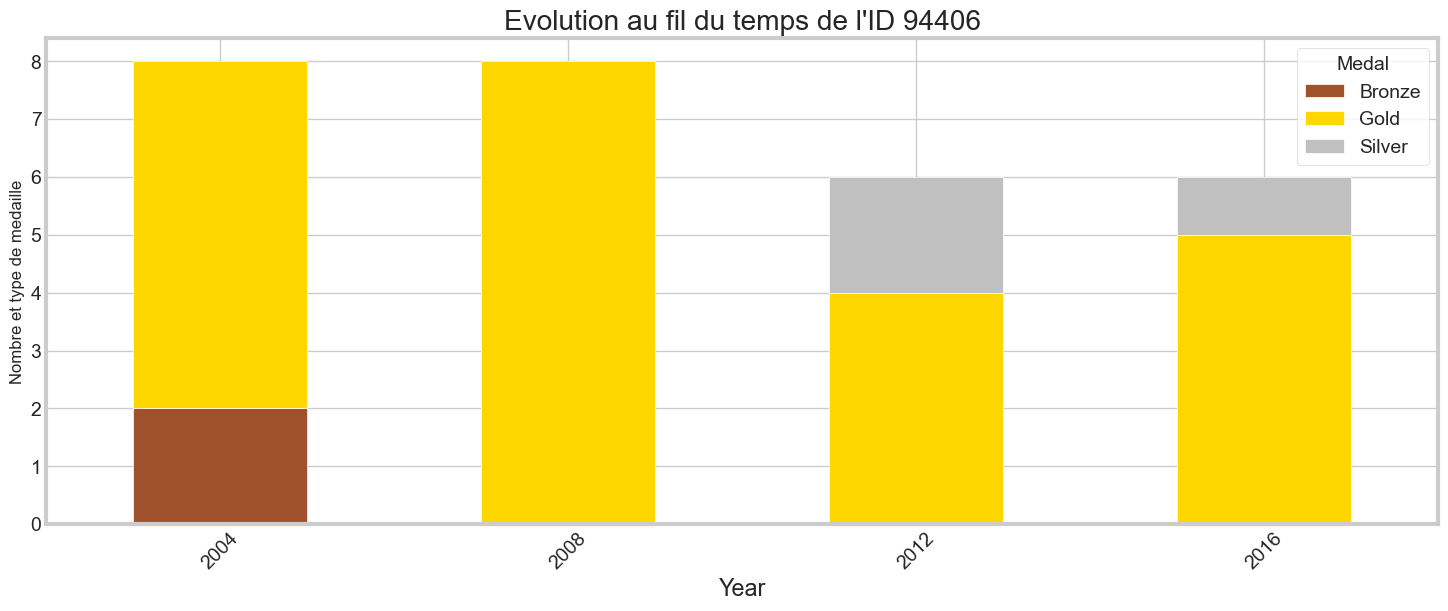

In [130]:
### On se concentre sur l'athlète d'ID = 5 uniquement 
### On se concentre sur la colonne medal ainsi que sur les années de jeux  
ID_5=jo_all.loc[jo_all["ID"]==5]
ID_5.groupby("Year")["Medal"].value_counts() 
### On voit que l'athlète d'ID 5 n'a remporter aucune medaille 


### On essaye de voir maintenant pour l'athlète d'ID 94406 
ID_94406=jo_all.loc[jo_all["ID"]==94406] 
### On compte,separe les differents type de medaille en chaque colonne et remplace les NaN par 0 
ID_94406=ID_94406.groupby(["Year","Medal"]).size().unstack(fill_value=0) 
print(ID_94406) 

#### Visualisation du resultat 
colors=["sienna","gold","silver"]
fig, ax=plt.subplots(1,1,figsize=(16,6)) 
ID_94406.plot(kind="bar",ax=ax,stacked=True,color=colors,rot=45) 
plt.title("Evolution au fil du temps de l'ID 94406") 
plt.xlabel("Year") 
plt.ylabel("Nombre et type de medaille", fontsize=12)  
plt.show() 


# 21. Comment evolue l'age moyen des athlètes au fil des jeux d'hiver ? (Tendance chronologique)

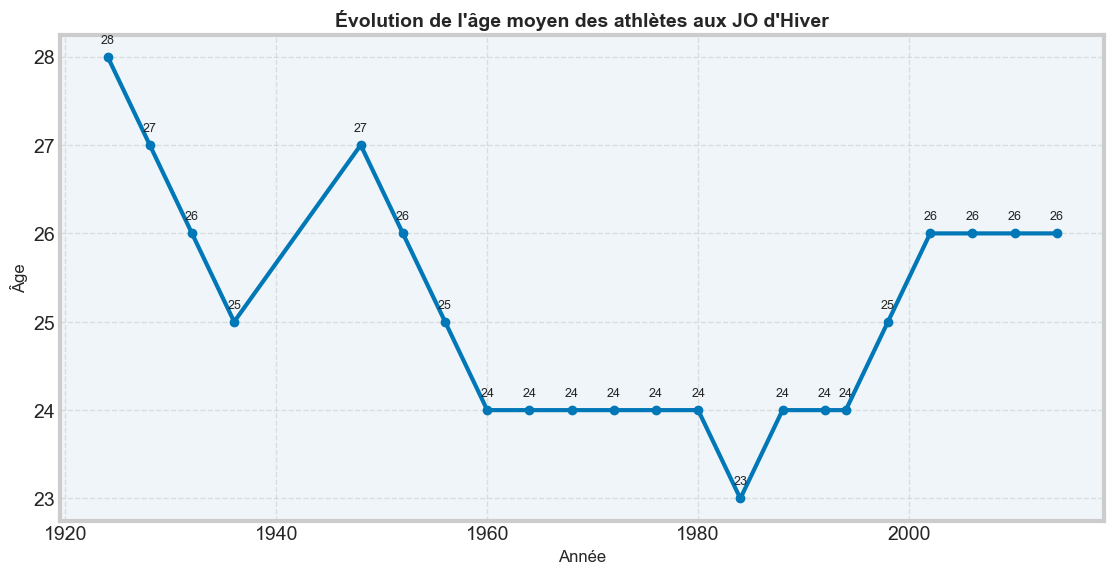

In [133]:
### On se concentre uniquement sur les jeux d'hiver 
### On avait deja definie jo_hiver pour les jeux d'hiver du coup on va les utiliser 
### Pour chaque athlètes d'ID unique et chaque an on obtient une seul valeur d'age 
moyen_hiver=jo_hiver.groupby(["Year","ID"])["Age"].first().reset_index() 
moyen_hiver 
### On regroupe maintenant par ans et toute en cherchant la moyenne pour chaque ans 
age_moyen_hiver=round(moyen_hiver.groupby("Year")["Age"].mean())
age_moyen_hiver 

### On va suivre l'age moyen des athlètes pour les jo_d'hivers a travers une bonne visualisation 
sns.set_style("whitegrid", {'axes.facecolor': '#f0f5f9'}) # Fond bleu très léger
plt.figure(figsize=(12, 6))

# On trace la ligne de l'âge moyen
plt.plot(age_moyen_hiver.index, age_moyen_hiver.values, 
         marker='o', linestyle='-', color='#0077b6', linewidth=3, label="Âge moyen")

# Ajout d'une ligne de tendance pour voir si les athlètes vieillissent globalement
plt.title("Évolution de l'âge moyen des athlètes aux JO d'Hiver", fontsize=14, fontweight='bold')
plt.xlabel("Année", fontsize=12)
plt.ylabel("Âge", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# On affiche les valeurs sur les points pour plus de précision
for x, y in zip(age_moyen_hiver.index, age_moyen_hiver.values):
    plt.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.show() 

# 22. Y a-t-il une relation entre la taille / le poids des athlètes et leurs chances de remporter une médaille (analyse statistique simple) ?

### Ici on doit verifier et comparer concrètement deux choses: 
#### Nous comparons deux groupes: 
#### Groupe A: Ceux qui ont obtenue une medaille 
#### Groupe B: Ceux qui n'ont absolument rien gagner aux Jo
### A la suite de cette analyse nous allons faire une approche approximative de la relation qu'il peut y avoir entre la taille / poids 

In [212]:
### Ici on va d'abord s'interesser au basketball 
### La taille moyenne de ceux qui ont obtenue une medaille diffère t elle de ceux qui n'en ont pas eu ?
### On va voir les basketteur qui ont obtenue une medaille 
basket=jo_all[jo_all["Sport"]=="Basketball"] 
### On va transformer les valeurs reels et manquantes en numerique ( 0 et 1)  
basket["Medal"].notna().astype(int) 
### On va creer une nouvelle colonne dans le DF pour stocker ce resultat
basket["Avoir_une_medaille"]=basket["Medal"].notna().astype(int) 
### On va chercher maintenant la moyenne 
moyenne=round(basket.groupby("Avoir_une_medaille")[["Height","Weight"]].mean().sort_values(by="Height",ascending=False),2)
print("Ceux qui ont obtenue une medaille se verront afficer 1 et ceux qui n'ont pas eu se verront afficher 0")
print(moyenne)

Ceux qui ont obtenue une medaille se verront afficer 1 et ceux qui n'ont pas eu se verront afficher 0
                    Height  Weight
Avoir_une_medaille                
1                   191.99   86.69
0                   190.47   85.44


C:\Users\pc\AppData\Local\Temp\ipykernel_81984\2786814181.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\pc\AppData\Local\Temp\ipykernel_81984\1852890726.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pc\AppData\Local\Temp\ipykernel_81984\1852890726.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\pc\AppData\Local\Temp\ipykernel_81984\1852890726.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




           Height  Weight
Has_Medal                
1          173.84   80.16
0          174.25   78.51


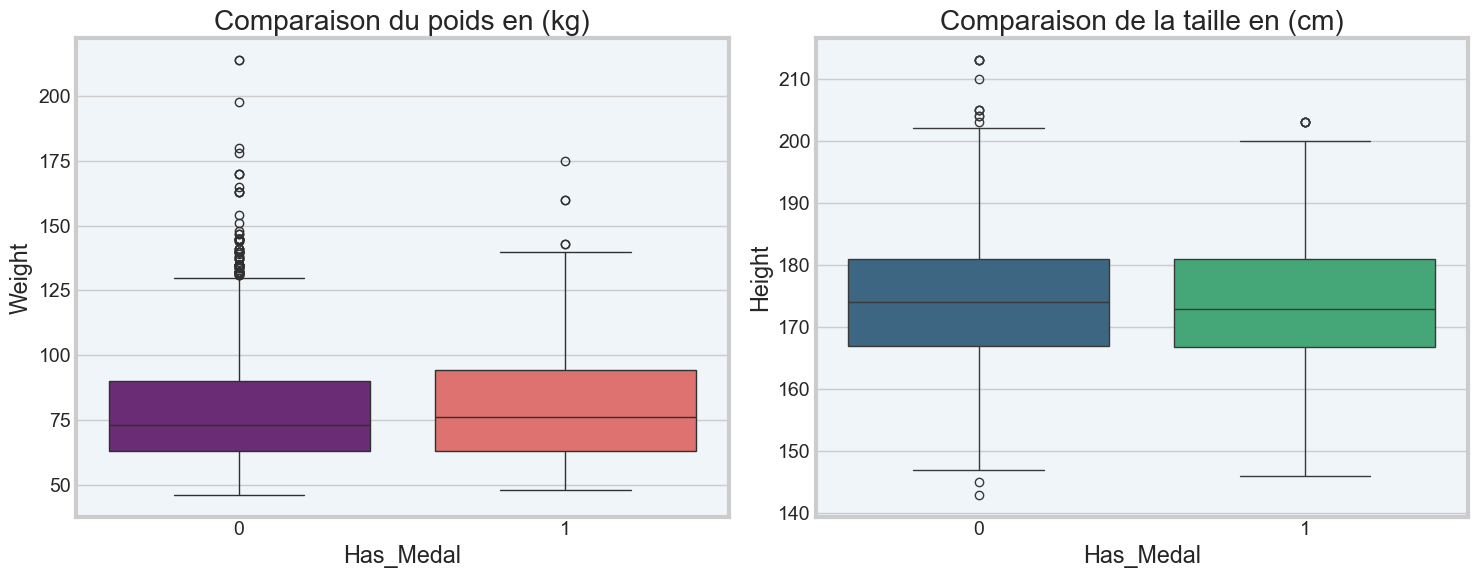

In [244]:
#### On utilise la meme approche 
judo=jo_all[jo_all["Sport"]=="Judo"]
### On transforme les valeurs reel et manquantes qui se trouvent dans la colonne "Medal" en numerique ( 1 et 0 ) 
judo["Medal"].notna().astype(int) 
### On creer une nouvelle colonne dans le DF_Judo pour stocker ce resultat
judo["Has_Medal"]=judo["Medal"].notna().astype(int) 
judo_medal=round(judo.groupby("Has_Medal")[["Height","Weight"]].mean().sort_values(by="Weight",ascending=False),2)
print(judo_medal) 

### On va visualiser ce resultat en Boxplot 
fig , (ax1,ax2) =plt.subplots(1,2,figsize=(15,6)) 
### Pour le 1 er graphique (poid)
sns.boxplot(data=judo ,x="Has_Medal",y="Weight",palette="magma",ax=ax1)
### Pour le second graphique (Taille) 
sns.boxplot(data=judo , x= "Has_Medal", y="Height" , palette="viridis",ax=ax2) 
ax1.set_title("Comparaison du poids en (kg)")
ax2.set_title("Comparaison de la taille en (cm)")
plt.tight_layout()
plt.show() 

# 🏁 Conclusion Générale:
## Cette analyse approfondie du Dataset historique des jeux olympiques nous à permis de voyager à travers plus d'un siècle de performance sportive. Au délà des chiffres, plusieurs enseignements majeurs et remarque pertinantes ceux sont fait appercevoir:


### 1. La professionnalisation du sport
####  L'évolution de l'age moyen des athlètes et des performances physiques(notamment dans les disciplines d'hiver) montre une spécialisation accrue. Le sport de haut niveau n'est plus seulement une question de jeunesse, mais de maturité technique et de preparation physique tout comme mentale.

###  2.L'integration du genre feminin
#### D'après les statistiques et les visualisations, on peut clairement s'apercevoir que les femmes ont beaucoup pris part aux activités notammant a partir des années 60 (dans les discipline d'été). Cela prouve que la participation de ces jeux n'était pas seulement reserver aux hommes et que les femmes aussi avaient leurs droit, meme si tout le nombre de femme a chaque édition reste inférieur à celui de hommes.

### 3.La morphologie sans faille
#### Notre focus sur le basket et sur le judo nous reveler une dynamique fascinante: l'influence des catégories taille et poids.
#### Nous avons prouver statistiquement que le fait de remporter une medaille ( victoire ) ne depends pas d'un gabarit "hors norme" mais de l'optimisation des capacités athlétiques dans un cadre reglementaire strick.

### 4. La participation des pays
#### Nos analyses ont prouver que les pays ayant les plus d'athlètes medaillés sont ceux qui ont fait le plus de participation aux jo

### 5. La Géographie du Succès
#### L'analyse nous a révélé que les courbes de performance ne sont pas uniquement sportives, elles sont aussi le reflet des soubresauts du XXe siècle :

#### 1932 (Los Angeles) : La chute de participation témoigne de la Grande Dépression, illustrant comment les crises économiques limitent l'accès à l'élite sportive.

#### 1956 (Melbourne) : Les anomalies observées rappellent les premières tensions de la Guerre Froide (Suez, Hongrie) et les contraintes logistiques (quarantaine équestre déportée en Suède).

#### 1980 (Moscou) : Le creux massif dans les données illustre le boycott historique mené par les États-Unis, rappelant que les statistiques olympiques sont indissociables du contexte diplomatique mondial.
#### Grâce à la visualisation cartographique, nous avons pu constater que si les JO sont un événement mondial, la densité des médailles raconte aussi l'histoire du développement économique et des politiques sportives nationales à travers les décennies.